<a href="https://colab.research.google.com/github/Fanusaez/7506R-2C2022-GRUPO13/blob/sabado-1-10-2022/7506R_TP1_GRUPO13_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Trabajo Practico 1 : Propiedades en Venta

## Grupo 13

### Integrantes:

- Ivan Manuel Pensado
- Axel Tomas Higa
- Edgardo Francisco Saez
- Lautaro Barrionuevo
- Nicolás Carreño


# Importe de librerias


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import sklearn as sk
import scipy.stats as st

from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler

import geopandas
from shapely.geometry import Point

# Lectura de archivo


In [2]:
ds_propiedades = pd.read_csv('properati_argentina_2021.csv')

In [3]:
ds_propiedades.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

# Análisis Exploratorio y Preprocesamiento de Dato


Se deben filtrar únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

In [4]:
ds_prop_filtrado = ds_propiedades[ds_propiedades.place_l2.str.contains('Capital Federal', case=False, na = False)]
ds_prop_filtrado = ds_prop_filtrado[ds_prop_filtrado.property_type.str.fullmatch('Departamento|Casa|ph', case = False, na = False)]
ds_prop_filtrado = ds_prop_filtrado[ds_prop_filtrado.operation.str.contains('venta', case=False, na =  False)]
ds_prop_filtrado = ds_prop_filtrado[ds_prop_filtrado.property_currency.str.contains('USD', case=False, na =  False)] 

Division Train/Test

In [5]:
train, test = train_test_split(ds_prop_filtrado,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=0)
print('# Datos Entrenamiento: {}'.format(len(train)))
print('# Datos Prueba: {}'.format(len(test)))

# Datos Entrenamiento: 75399
# Datos Prueba: 18850


## Exploración inicial


Tipo de variable


In [6]:
ds_train = train 
ds_test = test

In [7]:
ds_train.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Variables Cuantitativas


In [8]:
cuantitativos = ["latitud", "longitud", "property_rooms", "property_bedrooms","property_surface_total", "property_surface_covered", "property_price"]
ds_cuantitativo = ds_train.loc[:,cuantitativos]
ds_resumen_cuantitativo = pd.DataFrame()
ds_resumen_cuantitativo["media"] = ds_cuantitativo.mean()
ds_resumen_cuantitativo["mediana"] = ds_cuantitativo.median()
ds_resumen_cuantitativo["q1"] = ds_cuantitativo.quantile([.25]).iloc[0]
ds_resumen_cuantitativo["q3"] = ds_cuantitativo.quantile([.75]).iloc[0]
ds_resumen_cuantitativo["moda"] = ds_cuantitativo.mode().iloc[0]
ds_resumen_cuantitativo

media        mediana            q1  \
latitud                      -34.591533     -34.595789    -34.615975   
longitud                     -58.449751     -58.438956    -58.466432   
property_rooms                 2.824120       3.000000      2.000000   
property_bedrooms              2.015962       2.000000      1.000000   
property_surface_total       112.591274      65.000000     45.000000   
property_surface_covered      88.870856      58.000000     40.000000   
property_price            227201.214446  144000.000000  95000.000000   

                                     q3           moda  
latitud                      -34.577400     -34.541250  
longitud                     -58.408862     -58.472966  
property_rooms                 4.000000       3.000000  
property_bedrooms              3.000000       1.000000  
property_surface_total       105.000000      50.000000  
property_surface_covered      88.000000      40.000000  
property_price            236000.000000  110000.000000

Variables Cualitativas


In [9]:
cualitativos = ["place_l2", "place_l3", "operation", "property_type", "property_currency", "property_title"]
ds_cualitativo = ds_train.loc[:,cualitativos]

- Mostrar cantidad de valores posibles


In [10]:
ds_cualitativo.nunique()

place_l2                 1
place_l3                57
operation                1
property_type            3
property_currency        1
property_title       46431
dtype: int64

- Mostrar frecuencias
  - Obviamos las opciones de un solo tipo porque la frecuencia es de 100%


In [11]:
ds_cualitativo.place_l3.value_counts(normalize=True)* 100

Palermo                 15.351315
Belgrano                 9.561106
Caballito                7.640360
Recoleta                 6.693307
Villa Urquiza            4.981685
Almagro                  4.354312
Nuñez                    3.741592
Villa Crespo             3.381951
Flores                   3.266067
Barrio Norte             3.132867
Balvanera                2.683983
Colegiales               2.075258
Villa Devoto             2.049950
Villa del Parque         1.970030
Saavedra                 1.911422
Puerto Madero            1.607726
San Telmo                1.459873
San Cristobal            1.405261
San Nicolás              1.377289
Barracas                 1.345321
Retiro                   1.313353
Boedo                    1.306693
Floresta                 1.268065
Monserrat                1.200133
Parque Chacabuco         1.165501
Villa Pueyrredón         1.082917
Coghlan                  1.040293
Villa Luro               0.771229
Mataderos                0.764569
Chacarita     

In [12]:
ds_cualitativo.property_type.value_counts(normalize=True)* 100

Departamento    85.792915
PH               9.868831
Casa             4.338254
Name: property_type, dtype: float64

In [13]:
ds_cualitativo.property_title.value_counts(normalize=True)* 100

Departamento - Palermo                                                                                               1.588880
Departamento - Recoleta                                                                                              1.388613
Departamento - Belgrano                                                                                              1.141925
Departamento - Caballito                                                                                             0.998687
Departamento - Almagro                                                                                               0.710885
                                                                                                                       ...   
Departamento - Villa Crespo- Palermo Crespo- New-                                                                    0.001326
Excelente depto. Carlos Pellegrini y Posadas, contrafrente con espectacular vistas a jardines y rio; todo externo    0

- Determinar variables irrelevantes en el análisis


Debido a que las caracteristicas cualitativas "place_l2", "operation", "Property_currency" solo poseen un valor posible, es irrelevante para el analisis de datos. 

La caracteristica de "Property_title" al ser una descripcion del vendedor no aporta mucha informacion analitica. 

Los datos que no aportan al analisis, son las fechas, de las columnas "Start_date", "End_date" y "Created_on" debido a que no se especifica que significa dichas fechas




In [14]:
columnas_irrelevantes = ["start_date","end_date", "created_on","place_l2" , "operation", "property_currency", "property_title"]

def eliminar_columnas_irrelevantes(dataset):
    dataset.drop(columns = columnas_irrelevantes, inplace = True)

eliminar_columnas_irrelevantes(ds_train)
eliminar_columnas_irrelevantes(ds_test)
ds_train.head()

c:\Users\Equipo de fabrica\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


id    latitud   longitud  place_l3 place_l4  \
280087  CLj2GNCsBreAzTKFXCaLIQ== -34.601807 -58.469965  Paternal      NaN   
256350  TvqKIPzzT1urYfVhh8tC7w== -34.580088 -58.424965   Palermo      NaN   
135168  QRs3RUjw1RS5/WRne8ApbA== -34.551481 -58.452358  Belgrano      NaN   
227831  ju90QBsV36i7DCOOWCJpaA== -34.632290 -58.464844    Flores      NaN   
409101  uxD4SK3jtGbmxfIlN03UMQ== -34.549279 -58.463074     Nuñez      NaN   

       place_l5  place_l6 property_type  property_rooms  property_bedrooms  \
280087      NaN       NaN  Departamento             2.0                1.0   
256350      NaN       NaN  Departamento             2.0                1.0   
135168      NaN       NaN  Departamento             1.0                1.0   
227831      NaN       NaN  Departamento             5.0                3.0   
409101      NaN       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
280087                    53.0                      49.0         80000.0  
256350                    35.0                      35.0         79900.0  
135168                    25.0                      20.0         69000.0  
227831                    75.0                      75.0        150000.0  
409101                    46.0                      34.0         85000.0

Duplicados


In [15]:
ds_train.duplicated

<bound method DataFrame.duplicated of                               id    latitud   longitud       place_l3  \
280087  CLj2GNCsBreAzTKFXCaLIQ== -34.601807 -58.469965       Paternal   
256350  TvqKIPzzT1urYfVhh8tC7w== -34.580088 -58.424965        Palermo   
135168  QRs3RUjw1RS5/WRne8ApbA== -34.551481 -58.452358       Belgrano   
227831  ju90QBsV36i7DCOOWCJpaA== -34.632290 -58.464844         Flores   
409101  uxD4SK3jtGbmxfIlN03UMQ== -34.549279 -58.463074          Nuñez   
...                          ...        ...        ...            ...   
102622  KrB++PsffLm5wT+jyPEI7A== -34.628714 -58.413872          Boedo   
224388  zi6yDiIKRlsSauCnx8StQw== -34.587318 -58.452157      Chacarita   
206610  MrEk56luvBDgZJtBOkj2sA== -34.597385 -58.426269   Villa Crespo   
212425  k67elXRoisrCp5lARAIOqA== -34.601109 -58.425161        Almagro   
335036  wlDILCHrR2mQ6MymozbVzg== -34.577672 -58.495749  Villa Urquiza   

       place_l4 place_l5  place_l6 property_type  property_rooms  \
280087      NaN  

### Análisis gráfico de las distribuciones de las variables


#### Barrio

Cantidad de barrios

In [16]:
cant_barrios = ds_train["place_l3"].unique().size
print("La cantidad de Barrios es: " + str(cant_barrios))

La cantidad de Barrios es: 58


Cantidadad de propiedades por barrios

In [17]:
ds_train["place_l3"].value_counts()

Palermo                 11525
Belgrano                 7178
Caballito                5736
Recoleta                 5025
Villa Urquiza            3740
Almagro                  3269
Nuñez                    2809
Villa Crespo             2539
Flores                   2452
Barrio Norte             2352
Balvanera                2015
Colegiales               1558
Villa Devoto             1539
Villa del Parque         1479
Saavedra                 1435
Puerto Madero            1207
San Telmo                1096
San Cristobal            1055
San Nicolás              1034
Barracas                 1010
Retiro                    986
Boedo                     981
Floresta                  952
Monserrat                 901
Parque Chacabuco          875
Villa Pueyrredón          813
Coghlan                   781
Villa Luro                579
Mataderos                 574
Chacarita                 555
Liniers                   534
Villa Ortuzar             529
Parque Patricios          514
Villa Luga

Distribucion

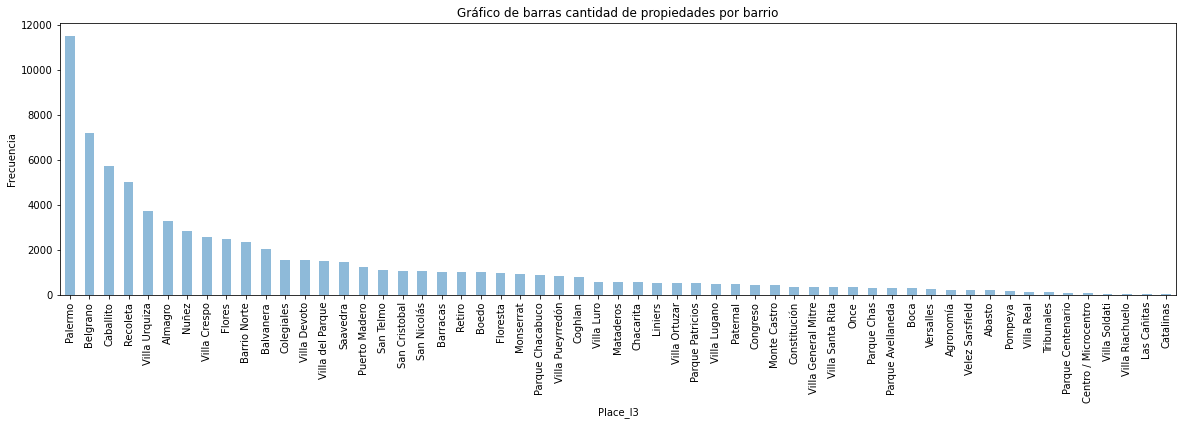

In [18]:
grf_ds=ds_train["place_l3"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de propiedades por barrio" , xlabel="Place_l3" , ylabel="Frecuencia", figsize=(20,5))

Palermo se lleva la mayor cantidad de propiedades, lo cual tiene sentido ya que palermo es un barrio muy grande y poblado.

Precio promedio de propiedad por barrio

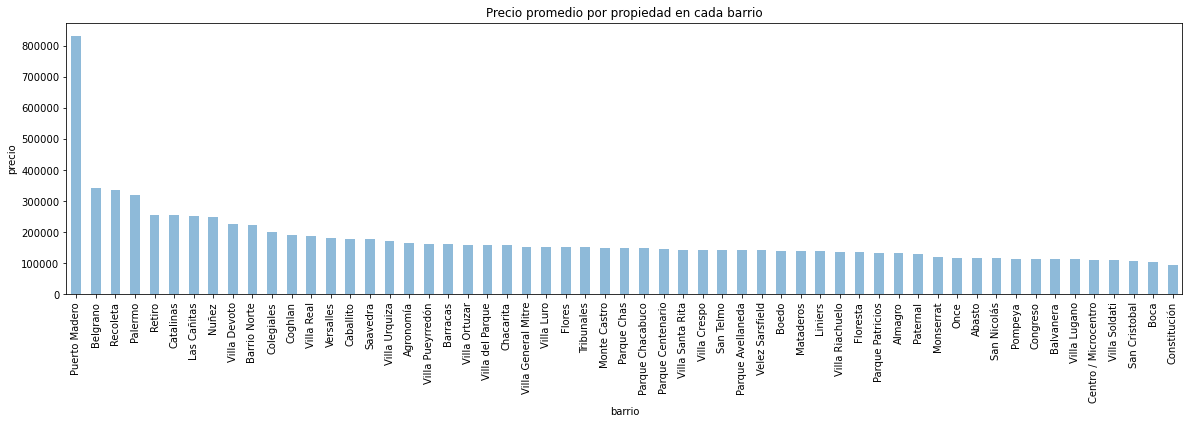

In [19]:
ds_precio_prom = ds_train.groupby(["place_l3"])["property_price"].mean().sort_values(ascending=False)
grf_ds=ds_precio_prom.plot.bar(alpha=0.5 , title="Precio promedio por propiedad en cada barrio" , xlabel="barrio" , ylabel="precio", figsize=(20,5))

Notar como Puerto Madero marca una gran diferencia de precios respecto a los otros barrios, situacion que coincide con la realidad.

#### Rooms

Cantidad de propiedades con 'n' habitaciones

In [20]:
ds_train["property_rooms"].value_counts()

3.0     21470
2.0     21120
4.0     13128
1.0     12053
5.0      4135
6.0      1464
7.0       596
8.0       283
9.0       136
10.0       83
11.0       26
12.0       25
14.0       15
15.0       10
13.0        6
16.0        3
20.0        3
18.0        2
17.0        2
19.0        2
30.0        1
35.0        1
24.0        1
28.0        1
32.0        1
36.0        1
Name: property_rooms, dtype: int64

Box plot

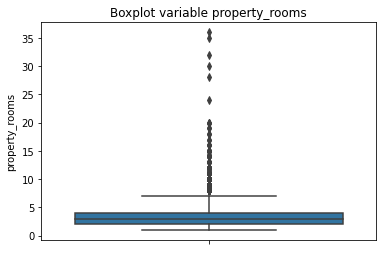

In [21]:
grf=sns.boxplot(y="property_rooms", data=ds_train).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="property_rooms")

Debido a que en "property_rooms" toma en cuenta todas las habitaciones de la propiedad, es normal que haya un promedio mas grande que en "property_bedrooms"

In [22]:
max = ds_train["property_rooms"].max()
min = ds_train["property_rooms"].min()
mean = ds_train["property_rooms"].mean()

print("La cantidad de rooms maximo es: " + str(max))
print("La cantidad de rooms minimo es: " + str(min))
print("La cantidad de rooms promedio es: " + str(mean))


La cantidad de rooms maximo es: 36.0
La cantidad de rooms minimo es: 1.0
La cantidad de rooms promedio es: 2.8241202660658726


#### Bedrooms

Cantidad de propiedades con 'n' dormitorios

In [23]:
ds_train["property_bedrooms"].value_counts()

 1.0     25513
 2.0     22047
 3.0     14112
 4.0      3821
 5.0       742
 6.0       194
 7.0        84
 8.0        48
 10.0       22
 9.0        21
 12.0       15
 16.0        6
 11.0        6
 14.0        5
 32.0        3
 13.0        3
 18.0        3
 20.0        3
 17.0        3
 15.0        3
 22.0        2
 70.0        1
 30.0        1
-1.0         1
Name: property_bedrooms, dtype: int64

Boxplot

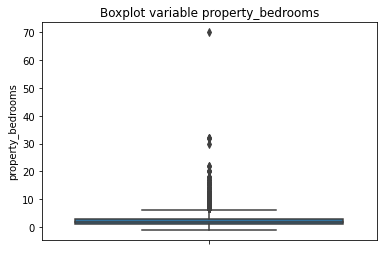

In [24]:
grf=sns.boxplot(y="property_bedrooms", data=ds_train).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="property_bedrooms")

Notar que la mayoria de las propiedades tienen menos de 5 bedrooms o menos.

In [25]:
max = ds_train["property_bedrooms"].max()
min = ds_train["property_bedrooms"].min()
mean = ds_train["property_bedrooms"].mean()

print("La cantidad de bedrooms maximo es: " + str(max))
print("La cantidad de bedrooms minimo es: " + str(min))
print("La cantidad de bedrooms promedio es: " + str(mean))


La cantidad de bedrooms maximo es: 70.0
La cantidad de bedrooms minimo es: -1.0
La cantidad de bedrooms promedio es: 2.0159618356110953


#### Surface Total & Covered

Boxplot surface_total

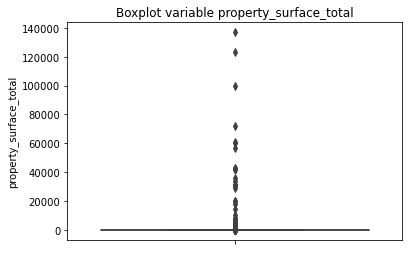

In [26]:
grf=sns.boxplot(y="property_surface_total", data=ds_train).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="property_surface_total")

In [27]:
max = ds_train["property_surface_total"].max()
min = ds_train["property_surface_total"].min()
mean = ds_train["property_surface_total"].mean()

print("El surface_total maximo es: " + str(max))
print("El surface_total minimo es: " + str(min))
print("El surface_total promedio es: " + str(mean))


El surface_total maximo es: 137000.0
El surface_total minimo es: 10.0
El surface_total promedio es: 112.59127372334181


El boxplot se ve como una linea debido a la cantidad de valores muy grandes que hay en el grafico, estos son valores atipicos.

Boxplot suface_covered

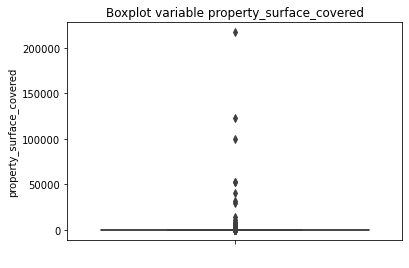

In [28]:
grf=sns.boxplot(y="property_surface_covered", data=ds_train).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="property_surface_covered")

In [29]:
max = ds_train["property_surface_covered"].max()
min = ds_train["property_surface_covered"].min()
mean = ds_train["property_surface_covered"].mean()

print("El surface_covered maximo es: " + str(max))
print("El surface_covered minimo es: " + str(min))
print("El surface_covered promedio es: " + str(mean))


El surface_covered maximo es: 217000.0
El surface_covered minimo es: 1.0
El surface_covered promedio es: 88.87085591658183


El boxplot se ve como una linea debido a la cantidad de valores muy grandes que hay en el grafico, estos son valores atipicos.

Valor maximo, minimo y promedio

In [30]:
max = ds_train["property_surface_total"].max()
min = ds_train["property_surface_total"].min()
mean = ds_train["property_surface_total"].mean()

print("Property_surface_total")
print("El valor maximo es: " + str(max))
print("El valor minimo es: " + str(min))
print("El valor promedio es: " + str(mean) + "\n")

max = ds_train["property_surface_covered"].max()
min = ds_train["property_surface_covered"].min()
mean = ds_train["property_surface_covered"].mean()

print("Property_surface_covered")
print("El valor maximo es: " + str(max))
print("El valor minimo es: " + str(min))
print("El valor promedio es: " + str(mean))



Property_surface_total
El valor maximo es: 137000.0
El valor minimo es: 10.0
El valor promedio es: 112.59127372334181

Property_surface_covered
El valor maximo es: 217000.0
El valor minimo es: 1.0
El valor promedio es: 88.87085591658183


#### Price

Boxplot

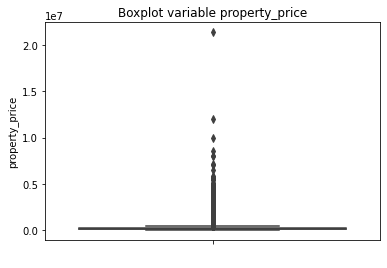

In [31]:
grf=sns.boxplot(y="property_price", data=ds_train).set(title="Boxplot variable property_price",xlabel=" ",ylabel="property_price")

Precio maximo y minimo y promedio

In [32]:
max = ds_train["property_price"].max()
min = ds_train["property_price"].min()
mean = ds_train["property_price"].mean()

print("El precio maximo es: " + str(max))
print("El precio minimo es: " + str(min))
print("El precio promedio es: " + str(mean))


El precio maximo es: 21400000.0
El precio minimo es: 5000.0
El precio promedio es: 227201.21444581493


### Correlaciones existentes entre las variables


- Analizar las correlaciones existentes entre las variables.


In [33]:
ds_train.corr()

latitud  longitud  place_l6  property_rooms  \
latitud                   1.000000 -0.230156       NaN        0.003493   
longitud                 -0.230156  1.000000       NaN       -0.007947   
place_l6                       NaN       NaN       NaN             NaN   
property_rooms            0.003493 -0.007947       NaN        1.000000   
property_bedrooms         0.000608 -0.008389       NaN        0.871541   
property_surface_total    0.024694 -0.014160       NaN        0.061457   
property_surface_covered  0.001964 -0.000942       NaN        0.074062   
property_price            0.016166  0.023086       NaN        0.483192   

                          property_bedrooms  property_surface_total  \
latitud                            0.000608                0.024694   
longitud                          -0.008389               -0.014160   
place_l6                                NaN                     NaN   
property_rooms                     0.871541                0.061457   
property_bedrooms                  1.000000                0.062421   
property_surface_total             0.062421                1.000000   
property_surface_covered           0.067214                0.660050   
property_price                     0.416916                0.081746   

                          property_surface_covered  property_price  
latitud                                   0.001964        0.016166  
longitud                                 -0.000942        0.023086  
place_l6                                       NaN             NaN  
property_rooms                            0.074062        0.483192  
property_bedrooms                         0.067214        0.416916  
property_surface_total                    0.660050        0.081746  
property_surface_covered                  1.000000        0.053285  
property_price                            0.053285        1.000000

- Notar alta correlacion entre "property_rooms" y "property_bedrooms", lo cual tiene mucho sentido ya que un departamento de 3 ambientes tiene 2 habitaciones, uno de 4 ambientes tiene 3 habitacioenes etc 
- Tambien podemos encontrar una correlcion moderada entre "property_surface_total" y "property_surface_covered" lo cual tambien se asemeja a la relaidad.
- Notamos como las correlaciones entre las variables property_rooms, bedrooms, surface_total & covered son todas positivas con property_price, ya que a medida que aumentan estos atributos, el precio tiende a aumentar.

#### Propety_bedrooms y Property_rooms

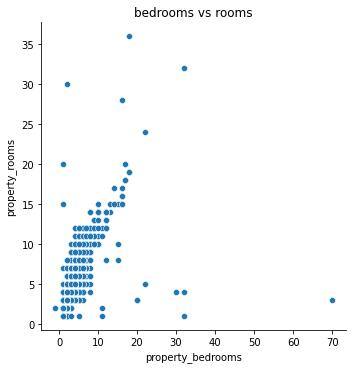

In [34]:
graf_relplot=sns.relplot(data=ds_train, x="property_bedrooms", y="property_rooms").set(title="bedrooms vs rooms",xlabel='property_bedrooms',ylabel='property_rooms')

Notar la correlacion positiva entre estas variables, a medida que aumenta property_bedrooms, aumenta property_rooms, lo cual tiene sentido ya que property_rooms son los dormitoros mas habitacion.

#### Surface_total y Surface_covered

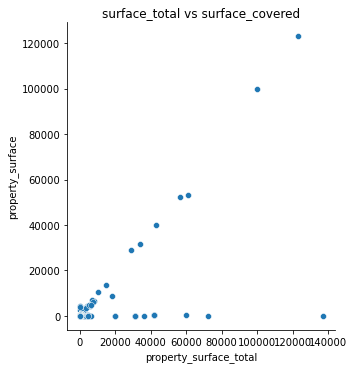

In [35]:
graf_relplot=sns.relplot(data=ds_train, x="property_surface_total", y="property_surface_covered").set(title="surface_total vs surface_covered",xlabel='property_surface_total',ylabel='property_surface')

Se puede ver una correlacion positiva entre estas variables, aunqye hay algunos puntos en los cuales parecen no tener correlacion

#### Price y Rooms

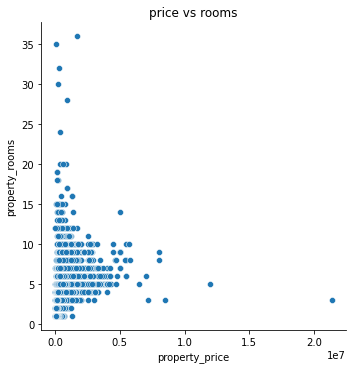

In [36]:
graf_relplot=sns.relplot(data=ds_train, x="property_price", y="property_rooms").set(title="price vs rooms",xlabel='property_price',ylabel='property_rooms')

SI bien la correlacion no es tan fuerte, hasta un cierto numero de habitaciones se puede ver como estan correlacionadas positivamente. A medida que aumenta el precio aumenta el numero de habitaciones.

### Conslusiones exploracion inicial

El analisis al que podemos llegar con la exoloracion inicial realizada es:

- Tenemos mucha mayor cantidad de propiedades de tipo "Departamento", que de tipo "Casa" o "PH"
- Mucha cantidad de propiedades en zonas como Palermo, Belgrano, Caballito y Recoleta
- La zona con el promedio de precios mas alto es Puerto Madero, seguido por Belgrano, Recoleta y Palermo
- Encontramos columnas en el dataset que debido a su falta de utilidad en el trabajo o su alto porcentaje de valores faltantes, decidimos sacarlos del dataset
- Descubrimos variables correlacionadas positivamente, como property_bedrooms con property_rooms y property_surface_covered con property_surface_total 
- Encontramos valores negativos, como por ejemplo en property_bedrooms, lo cual nos hace pensar que puede haber mas valores erroneos que habra que detectar.

## Datos faltantes


### Análisis de datos faltantes

Porcentaje de datos faltantes por columna

In [37]:
filas_totales=ds_train.shape[0]
print(ds_train.isna().sum()/filas_totales*100)

id                            0.000000
latitud                       3.986790
longitud                      3.986790
place_l3                      0.429714
place_l4                     96.045040
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.102137
property_bedrooms            11.591666
property_surface_total        5.099537
property_surface_covered      3.587581
property_price                0.000000
dtype: float64


Cantidad de datos faltantes por columna

In [38]:
print(ds_train.isna().sum())

id                              0
latitud                      3006
longitud                     3006
place_l3                      324
place_l4                    72417
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                831
property_bedrooms            8740
property_surface_total       3845
property_surface_covered     2705
property_price                  0
dtype: int64


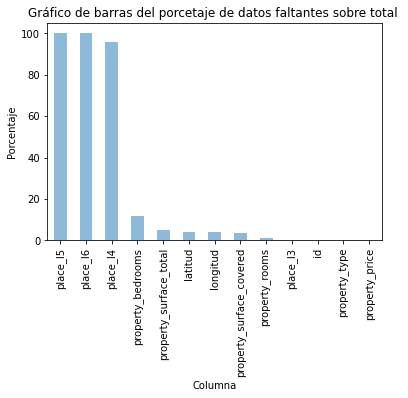

In [39]:
ds_porcentaje = ds_train.isna().sum()/filas_totales*100
ds_porcentaje = ds_porcentaje.sort_values(ascending=False)
grf_ds = ds_porcentaje.plot.bar(alpha=0.5 , title="Gráfico de barras del porcetaje de datos faltantes sobre total " , xlabel="Columna" , ylabel="Porcentaje")

Tomando en cuenta estos resultados, decidimos eliminar las columnas l4 , l5 y l6 debido a que el porcentaje de datos faltantes es total o casi total. En el caso de l5 y l6 son de 100 por ciento por lo cual no se podria completar y en el caso de l4 son las subdivisiones barriales de los cuales muchos no poseen.


In [40]:

columnas_a_elimianar = ["place_l4","place_l5","place_l6"]
def eliminar_columnas_nans(dataset):
    dataset.drop(columns = columnas_a_elimianar, inplace = True)
    
eliminar_columnas_nans(ds_train)
eliminar_columnas_nans(ds_test)

c:\Users\Equipo de fabrica\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
ds_train.head()

id    latitud   longitud  place_l3  \
280087  CLj2GNCsBreAzTKFXCaLIQ== -34.601807 -58.469965  Paternal   
256350  TvqKIPzzT1urYfVhh8tC7w== -34.580088 -58.424965   Palermo   
135168  QRs3RUjw1RS5/WRne8ApbA== -34.551481 -58.452358  Belgrano   
227831  ju90QBsV36i7DCOOWCJpaA== -34.632290 -58.464844    Flores   
409101  uxD4SK3jtGbmxfIlN03UMQ== -34.549279 -58.463074     Nuñez   

       property_type  property_rooms  property_bedrooms  \
280087  Departamento             2.0                1.0   
256350  Departamento             2.0                1.0   
135168  Departamento             1.0                1.0   
227831  Departamento             5.0                3.0   
409101  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
280087                    53.0                      49.0         80000.0  
256350                    35.0                      35.0         79900.0  
135168                    25.0                      20.0         69000.0  
227831                    75.0                      75.0        150000.0  
409101                    46.0                      34.0         85000.0

#### Latitud y Longitud

Grafico de cantidad de datos faltantes respecto al total

In [42]:
lat_long = ds_train[["latitud", "longitud"]].isna()

lat_long.loc[lat_long.loc[:,"latitud"]==True,"latitud"]="nans"
lat_long.loc[lat_long.loc[:,"latitud"]==False,"latitud"]="no_nans"

lat_long.loc[lat_long.loc[:,"longitud"]==True,"longitud"]="nans"
lat_long.loc[lat_long.loc[:,"longitud"]==False,"longitud"]="no_nans"

lat_long.head()


latitud longitud
280087  no_nans  no_nans
256350  no_nans  no_nans
135168  no_nans  no_nans
227831  no_nans  no_nans
409101  no_nans  no_nans

Grafico Latitud

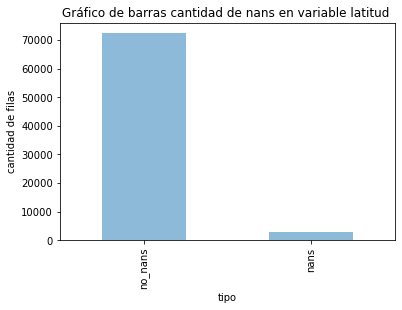

In [43]:
grf_ds=lat_long["latitud"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable latitud " , xlabel="tipo" , ylabel="cantidad de filas")

In [44]:
cant_no_nans = lat_long["latitud"].value_counts().to_list()[0]
cant_nans = lat_long["latitud"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 3006


Grafico longitud

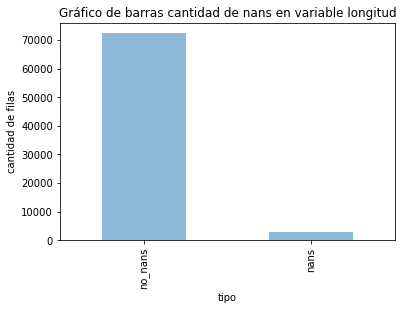

In [45]:
grf_ds=lat_long["longitud"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable longitud" , xlabel="tipo" , ylabel="cantidad de filas")

In [46]:
cant_no_nans = lat_long["longitud"].value_counts().to_list()[0]
cant_nans = lat_long["longitud"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 3006


#### Barrio (place_l3)

In [47]:
barrio = ds_train[["place_l3"]].isna()

barrio.loc[barrio.loc[:,"place_l3"]==True,"place_l3"]= "nans"
barrio.loc[barrio.loc[:,"place_l3"]==False,"place_l3"]= "no_nans"

barrio.head()

place_l3
280087  no_nans
256350  no_nans
135168  no_nans
227831  no_nans
409101  no_nans

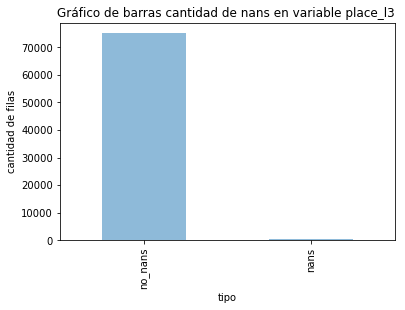

In [48]:
grf_ds=barrio["place_l3"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable place_l3 " , xlabel="tipo" , ylabel="cantidad de filas")

In [49]:
cant_no_nans = barrio["place_l3"].value_counts().to_list()[0]
cant_nans = barrio["place_l3"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 324


#### Rooms & bedrooms

In [50]:
rooms_bedrooms = ds_train[["property_rooms", "property_bedrooms"]].isna()

rooms_bedrooms.loc[rooms_bedrooms.loc[:,"property_rooms"]==True,"property_rooms"]="nans"
rooms_bedrooms.loc[rooms_bedrooms.loc[:,"property_rooms"]==False,"property_rooms"]="no_nans"

rooms_bedrooms.loc[rooms_bedrooms.loc[:,"property_bedrooms"]==True,"property_bedrooms"]="nans"
rooms_bedrooms.loc[rooms_bedrooms.loc[:,"property_bedrooms"]==False,"property_bedrooms"]="no_nans"

rooms_bedrooms.head()

property_rooms property_bedrooms
280087        no_nans           no_nans
256350        no_nans           no_nans
135168        no_nans           no_nans
227831        no_nans           no_nans
409101        no_nans           no_nans

Variable property_rooms

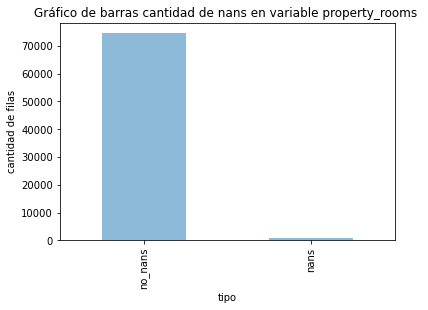

In [51]:
grf_ds=rooms_bedrooms["property_rooms"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable property_rooms " , xlabel="tipo" , ylabel="cantidad de filas")

In [52]:
cant_no_nans = rooms_bedrooms["property_rooms"].value_counts().to_list()[0]
cant_nans = rooms_bedrooms["property_rooms"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 831


Variable property_bedrooms

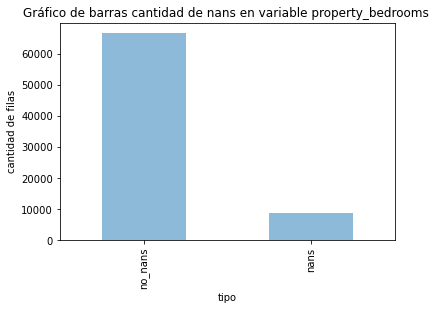

In [53]:
grf_ds=rooms_bedrooms["property_bedrooms"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable property_bedrooms " , xlabel="tipo" , ylabel="cantidad de filas")

In [54]:
cant_no_nans = rooms_bedrooms["property_bedrooms"].value_counts().to_list()[0]
cant_nans = rooms_bedrooms["property_bedrooms"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 8740


#### Surface Total & Covered

In [55]:
total_covered = ds_train[["property_surface_total", "property_surface_covered"]].isna()

total_covered.loc[total_covered.loc[:,"property_surface_total"]==True,"property_surface_total"]="nans"
total_covered.loc[total_covered.loc[:,"property_surface_total"]==False,"property_surface_total"]="no_nans"

total_covered.loc[total_covered.loc[:,"property_surface_covered"]==True,"property_surface_covered"]="nans"
total_covered.loc[total_covered.loc[:,"property_surface_covered"]==False,"property_surface_covered"]="no_nans"

total_covered.head()

property_surface_total property_surface_covered
280087                no_nans                  no_nans
256350                no_nans                  no_nans
135168                no_nans                  no_nans
227831                no_nans                  no_nans
409101                no_nans                  no_nans

Variable property_surface_total

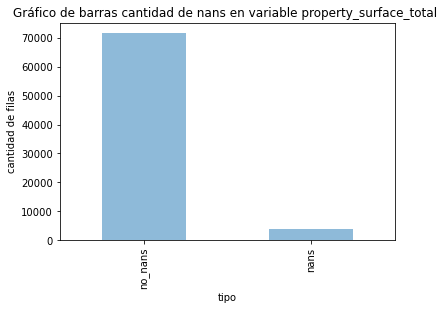

In [56]:
grf_ds=total_covered["property_surface_total"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable property_surface_total " , xlabel="tipo" , ylabel="cantidad de filas")

In [57]:
cant_no_nans = total_covered["property_surface_total"].value_counts().to_list()[0]
cant_nans = total_covered["property_surface_total"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 3845


Variable property_surface_covered

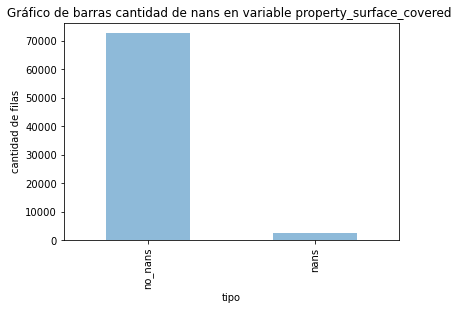

In [58]:
grf_ds=total_covered["property_surface_covered"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable property_surface_covered " , xlabel="tipo" , ylabel="cantidad de filas")

In [59]:
cant_no_nans = total_covered["property_surface_covered"].value_counts().to_list()[0]
cant_nans = total_covered["property_surface_covered"].value_counts().to_list()[1]

print("Cantidad total del dataset: " + str(cant_no_nans + cant_nans))
print("Cantidad total de nans: " + str(cant_nans))

Cantidad total del dataset: 75399
Cantidad total de nans: 2705


#### Precio

In [60]:
precio = ds_train[["property_price"]].isna()

precio.loc[precio.loc[:,"property_price"]==True,"property_price"]= "nans"
precio.loc[precio.loc[:,"property_price"]==False,"property_price"]= "no_nans"

precio.head()

property_price
280087        no_nans
256350        no_nans
135168        no_nans
227831        no_nans
409101        no_nans

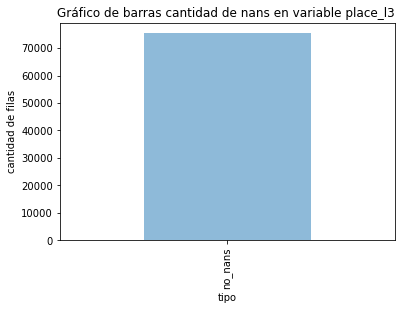

In [61]:
grf_ds=precio["property_price"].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans en variable place_l3 " , xlabel="tipo" , ylabel="cantidad de filas")

Esta variable no posee valores nulos, al igual que "property_type"

### Datos faltantes a nivel fila

Cantidad de filas que poseen datos faltantes

In [62]:
filas_cantidad_nan = pd.DataFrame(ds_train).isna().sum(axis=1).to_frame("cantidad")
cantidad = len(filas_cantidad_nan[filas_cantidad_nan["cantidad"] > 0])
print(f"Hay {cantidad} lineas que poseen uno o mas valores faltantes")

Hay 17072 lineas que poseen uno o mas valores faltantes


Grafico de barras de cantidad de filas con diferente cantidad de valores nulos

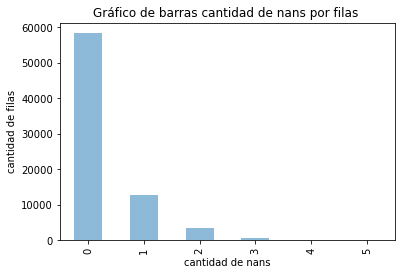

In [63]:
grf_ds=filas_cantidad_nan['cantidad'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras cantidad de nans por filas " , xlabel="cantidad de nans" , ylabel="cantidad de filas")

In [64]:
cant_nans_fila = filas_cantidad_nan['cantidad'].value_counts()
cero = cant_nans_fila[0]
uno = cant_nans_fila[1]
dos =  cant_nans_fila[2]
tres =  cant_nans_fila[3]
cuatro = cant_nans_fila[4]
cinco = cant_nans_fila[5]

### Estartegias para rellenar valores faltantes

#### Cold deck para rellenar barrios

Dado que poseemos la latitud y longitud de casi todas las propiedades, vamos a utilizar imputacion Cold Deck, para rellenar los datos faltantes de la columna "place_l3"

Primero procedemos imputando los cualitativos, que en este caso solo es el place_l3.
Utilizando un archivo csv proporcionado por el gobierno de la Ciudad Autonoma de Buenos Aires, el cual nos proporcionorá el nombre de la localidad usando latitud y longitud, mediante la utilizacion de Polygon.
https://data.buenosaires.gob.ar/dataset/barrios


In [65]:
ds_barrios = pd.read_csv('barrios.csv', header=0,sep=';')

from shapely.geometry import MultiPolygon, Polygon, Point
from shapely import wkt
ds_barrios.WKT = ds_barrios.WKT

def rellenar_barrios(dataset):
    for index, registro_prop in dataset.iterrows():
        if  type(registro_prop["place_l3"]) is str:
            continue
        for index_, registro_barrio in ds_barrios.iterrows():
            if wkt.loads(registro_barrio.WKT).covers(Point(registro_prop.longitud,registro_prop.latitud)):
                barrio_aux = registro_barrio['BARRIO']
                dataset.loc[index, 'place_l3'] = barrio_aux

rellenar_barrios(ds_train)
rellenar_barrios(ds_test)

c:\Users\Equipo de fabrica\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Me fijo si quedo algun place_l3 incompleto.


In [66]:
ds_train["place_l3"].isna().value_counts()

False    75117
True       282
Name: place_l3, dtype: int64

Eliminamos aquellas que no tengan place_l3 porque no se pueden completar por el barrio o tienen mal el dato ej: dato con latitud -31.678 y longitud -63.87964 pertenece a Cordoba pero place_l2 es Capital federal por lo que puede ser que el dato este subido erroneamente. 

Tambien eliminamos los registros sin latitud ni longitud porque no es posible saber su dato exacto y puede ser un registro mal cargado. 

Y vemos cuantos datos faltantes quedan.


In [67]:
def eliminar_fallidos_colddeck(dataset):
    dataset.dropna(subset=["place_l3", "longitud", "latitud"], inplace=True)

eliminar_fallidos_colddeck(ds_train)
eliminar_fallidos_colddeck(ds_test)

c:\Users\Equipo de fabrica\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Verificamos que no hayan nans en las variables
- Latitud
- Longitud
- place_l3

In [68]:
filas_totales=ds_train.shape[0]
print(ds_train.isna().sum()/filas_totales*100)


id                           0.000000
latitud                      0.000000
longitud                     0.000000
place_l3                     0.000000
property_type                0.000000
property_rooms               0.971774
property_bedrooms           11.543626
property_surface_total       4.994532
property_surface_covered     3.568709
property_price               0.000000
dtype: float64


In [69]:
filas_totales=ds_test.shape[0]
print(ds_test.isna().sum()/filas_totales*100)


id                           0.000000
latitud                      0.000000
longitud                     0.000000
place_l3                     0.000000
property_type                0.000000
property_rooms               0.923468
property_bedrooms           11.828135
property_surface_total       5.203495
property_surface_covered     3.395267
property_price               0.000000
dtype: float64


#### Mice para rellenar 

A rellenar:

- property_surface_total
- property_surface_covered
- property_rooms
- property_bedrooms

Aplicamos Mice para rellenar  los datos faltantes, ya que creemos que los datos faltantes en estas columnas son MAR (missing at random), por ejemplo:

- Las columnas property_bedrooms y property_rooms pueden estar faltando datos porque los que completaron el registro no sabia la diferencia Y solo completaron uno
- Lo mismo sucede con surface_total y surface_covered, puede ser que solo haga falta rellenar una de las dos, o no se sepa la diferencia entre ambas: Por ejemplo el balcon, patio de una casa, pileta etc 

Verificamos que no hayan duplicados y los eliminamos

Esto lo realizamos ya que los registeros repetidos no aportan ningun valor al estudio del mismo, y pueden dañar nuestas predicciones en MICE y proximos modelos en el TP

In [70]:
print(ds_train[ds_train.duplicated(keep=False)])
print(ds_test[ds_test.duplicated(keep=False)]) 

Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []
Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []


In [71]:
ds_train = ds_train.drop_duplicates()
ds_test = ds_test.drop_duplicates()

In [72]:
print(ds_train[ds_train.duplicated(keep=False)]) 
print(ds_test[ds_test.duplicated(keep=False)]) 

Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []
Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []


Nos fijamos si hay algun valor sospechoso que sea negativo en train

In [73]:
columnas_con_numeros = ['property_price', 'property_surface_total', 'property_surface_covered', 'property_rooms', 'property_bedrooms']
(ds_train[columnas_con_numeros] <= 0).any().to_frame('Menor que 0 ?')

Menor que 0 ?
property_price                    False
property_surface_total            False
property_surface_covered          False
property_rooms                    False
property_bedrooms                  True

Property_bedrooms tiene numero negativo, asi que veo cuantos hay

In [74]:
ds_prop_filtrado[ds_prop_filtrado['property_bedrooms'] < 1]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Solo hay uno asi que se lo coloca en nan porque no condiciona el analisis pero el dato es incorrecto

In [75]:
ds_train.loc[ds_prop_filtrado['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

Hago lo mismo para el dataset de test

In [76]:
columnas_con_numeros = ['property_price', 'property_surface_total', 'property_surface_covered', 'property_rooms', 'property_bedrooms']
(ds_test[columnas_con_numeros] <= 0).any().to_frame('Menor que 0 ?')

Menor que 0 ?
property_price                    False
property_surface_total            False
property_surface_covered          False
property_rooms                    False
property_bedrooms                 False

No hay numeros negativos en ds_test

guardo una copia pre imputacion para despues

In [77]:
ds_copia_pre_imputacion = ds_train.copy()

Luego imputaremos los datos cuantitativos faltantes utilizando el metodo MICE.


In [78]:
columnas =['property_surface_total','property_surface_covered','property_rooms','property_bedrooms'] 
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0,imputation_order='roman',initial_strategy = "mean", min_value=1)

def rellenar_con_mice(train, test):
    df_eliminar_nans_op3 = train[columnas].copy()
    train[columnas] = imp.fit_transform(df_eliminar_nans_op3)
    test[columnas] = imp.transform(test[columnas])

rellenar_con_mice(ds_train, ds_test)

ds_train[['property_rooms','property_bedrooms']] = ds_train[['property_rooms','property_bedrooms']].round()
ds_test[['property_rooms','property_bedrooms']] = ds_test[['property_rooms','property_bedrooms']].round()

verifico haber rellando los espacios nulos

In [79]:
filas_totales = ds_train.shape[0]
print(ds_train.isna().sum()/filas_totales*100)

id                          0.0
latitud                     0.0
longitud                    0.0
place_l3                    0.0
property_type               0.0
property_rooms              0.0
property_bedrooms           0.0
property_surface_total      0.0
property_surface_covered    0.0
property_price              0.0
dtype: float64


### Comparamos distribuciones de los atributos que imputamos y comparamos con la distribucion anterior a la imputacion

#### Comparamos property_bedrooms


[Text(0.5, 1.0, 'Boxplot variable property_bedrooms post imputacion')]

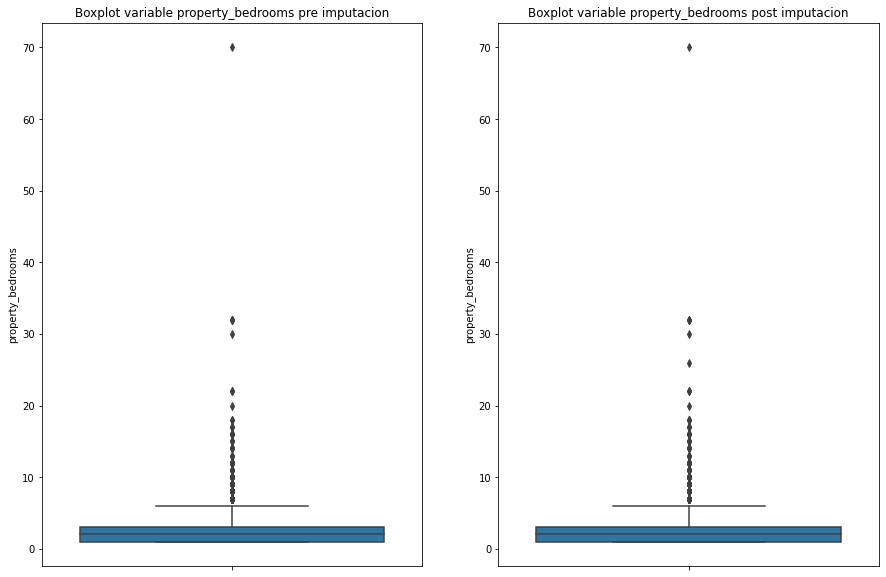

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.boxplot(y="property_bedrooms", data=ds_copia_pre_imputacion, ax=axes[0]).set( title="Boxplot variable property_bedrooms pre imputacion")
sns.boxplot(y="property_bedrooms", data=ds_train, ax=axes[1]).set( title="Boxplot variable property_bedrooms post imputacion")


Si observamos el Boxplot de ambos dataset, podemos ver que son muy similares, excepto por una observacion entre el 20 y 30, por lo que podemos asumir que las imputacions fueron dentro del rango ya establecido de dormitorios. No se imputaron con valores extremadamente bajos ni altos.

In [81]:
pre_imputacion_bedrooms = ds_copia_pre_imputacion["property_bedrooms"].value_counts().to_frame().reset_index()
pre_imputacion_bedrooms = pre_imputacion_bedrooms.rename({'index': 'bedrooms', "property_bedrooms" : "cantidad"}, axis=1)
pre_imputacion_bedrooms = pre_imputacion_bedrooms.sort_values('bedrooms',ascending=True)

post_imputacion_bedrooms = ds_train["property_bedrooms"].value_counts().to_frame().reset_index()
post_imputacion_bedrooms = post_imputacion_bedrooms.rename({'index': 'bedrooms', "property_bedrooms" : "cantidad"}, axis=1)
post_imputacion_bedrooms = post_imputacion_bedrooms.sort_values('bedrooms',ascending=True)

In [82]:
pre_imputacion_bedrooms.head()

bedrooms  cantidad
0       1.0     24535
1       2.0     21217
2       3.0     13449
3       4.0      3615
4       5.0       685

In [83]:
post_imputacion_bedrooms.head()

bedrooms  cantidad
0       1.0     32142
1       2.0     21719
2       3.0     13620
3       4.0      3637
4       5.0       697

Vemos cantidad de imputaciones realizadas

In [84]:
print(ds_copia_pre_imputacion.isna().sum())

id                             0
latitud                        0
longitud                       0
place_l3                       0
property_type                  0
property_rooms               702
property_bedrooms           8340
property_surface_total      3608
property_surface_covered    2578
property_price                 0
dtype: int64


Previo a la imputacion de mice, habia 7434 registros con valores nulos en "property_bedrooms", todos fueron rellenados. Observando los datasets
pre_imputacion_bedrooms y post__imputacion_bedrooms notamos que:

- 6745 registros se imputaron con el valor de un dormitorio
- 554 registros se imputaron con el valor de dos dormitorios
- 157 registros se imputaron con el valor de tres dormitorios
- 12 registros se imputaron con el valor de cuatro dormitorios
- etc

Esto nos indica que la mayoria de los registros con valores nans en "property_bedrooms" fueron rellenados con un dormitorio

#### Comparamos property_rooms

[Text(0.5, 1.0, 'Boxplot variable property_rooms post imputacion')]

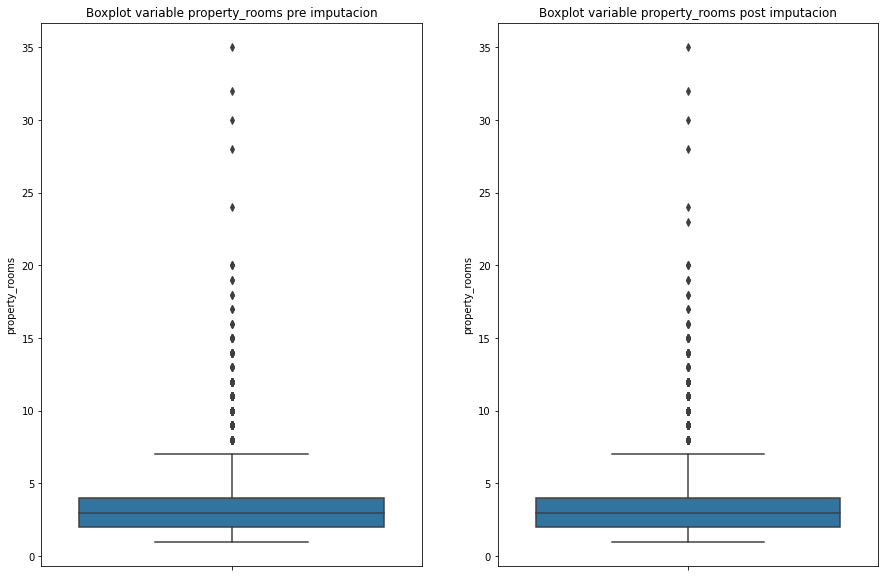

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.boxplot(y="property_rooms", data=ds_copia_pre_imputacion, ax=axes[0]).set( title="Boxplot variable property_rooms pre imputacion")
sns.boxplot(y="property_rooms", data=ds_train, ax=axes[1]).set( title="Boxplot variable property_rooms post imputacion")

<AxesSubplot:>

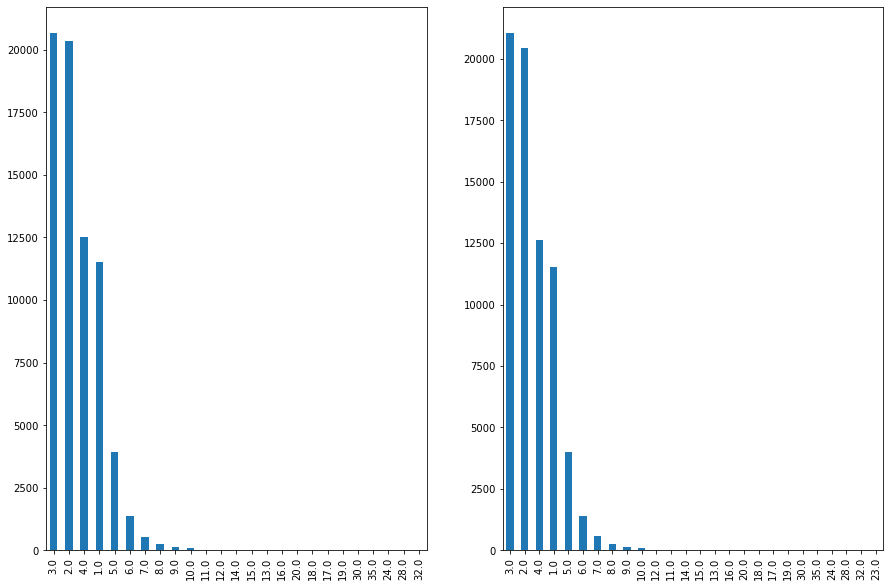

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_copia_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

Analizamos valores imputados


In [87]:
pre_imputacion_rooms = ds_copia_pre_imputacion["property_rooms"].value_counts().to_frame().reset_index()
pre_imputacion_rooms = pre_imputacion_rooms.rename({'index': 'rooms', "property_rooms" : "cantidad"}, axis=1)
pre_imputacion_rooms = pre_imputacion_rooms.sort_values('rooms',ascending=True)

post_imputacion_rooms = ds_train["property_rooms"].value_counts().to_frame().reset_index()
post_imputacion_rooms = post_imputacion_rooms.rename({'index': 'rooms', "property_rooms" : "cantidad"}, axis=1)
post_imputacion_rooms = post_imputacion_rooms.sort_values('rooms',ascending=True)

In [88]:
pre_imputacion_rooms.head()

rooms  cantidad
3    1.0     11539
1    2.0     20357
0    3.0     20680
2    4.0     12528
4    5.0      3932

In [89]:
post_imputacion_rooms.head()

rooms  cantidad
3    1.0     11539
1    2.0     20432
0    3.0     21056
2    4.0     12633
4    5.0      4006

Vemos cantidad de imputaciones realizadas

In [90]:
print(ds_copia_pre_imputacion.isna().sum())

id                             0
latitud                        0
longitud                       0
place_l3                       0
property_type                  0
property_rooms               702
property_bedrooms           8340
property_surface_total      3608
property_surface_covered    2578
property_price                 0
dtype: int64


Previo a la imputacion de mice, habia 652 registros con valores nulos en "property_rooms", todos fueron rellenados. Observando los datasets
pre_imputacion_rooms y post__imputacion_rooms notamos que:

- 0 registros se imputaron con el valor de una habitacion
- 73 registros se imputaron con el valor de dos habitaciones
- 361 registros se imputaron con el valor de tres habitaciones
- 98 registros se imputaron con el valor de cuatro habitaciones
- 58 registros se imputaron con el valor de cinco habitaciones
- etc

Esto nos indica que la mayoria de los registros con valores nans en "property_bedrooms" fueron rellenados con tres habitaciones

#### Comparamos property_surface_total

[Text(0.5, 1.0, 'Boxplot variable property_surface_total post imputacion')]

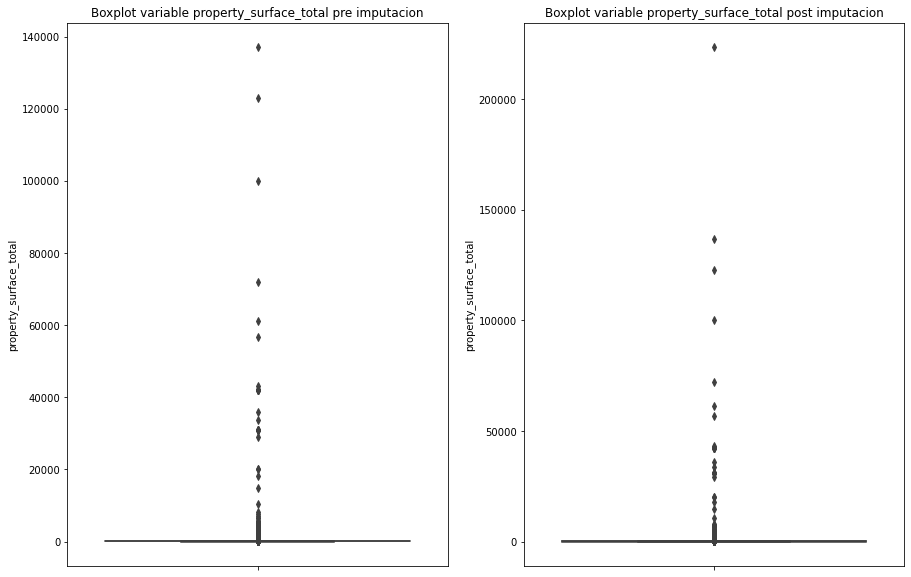

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.boxplot(y="property_surface_total", data=ds_copia_pre_imputacion, ax=axes[0]).set( title="Boxplot variable property_surface_total pre imputacion")
sns.boxplot(y="property_surface_total", data=ds_train, ax=axes[1]).set( title="Boxplot variable property_surface_total post imputacion")


Si observamos el grafico vemos que hubo valores que se impurtaron de alto valor, por ejemplo el registro que tiene un valor de mas de 200000 metros cuadrados. Puede ser un registro mal clasificado, mas adelante se lo estudiara para saber si puede ser tomado como un outlier y eliminarlo.

In [92]:
promedio_pre_imputacion = ds_copia_pre_imputacion["property_surface_total"].mean()
promedio_post_imputacion = ds_train["property_surface_total"].mean()

print("El promedio pre imputacion de la variable property_surface_total tiene un valor de: " + str(promedio_pre_imputacion))
print("El promedio post imputacion de la variable property_surface_total tiene un valor de: " + str(promedio_post_imputacion))

El promedio pre imputacion de la variable property_surface_total tiene un valor de: 111.32925354431671
El promedio post imputacion de la variable property_surface_total tiene un valor de: 114.65469229265001


Podemos observar que es muy parecido el promedio observado por los dos datasets, pero el post imputacion es un poco mas grande. 
Podiramos pensar que los valos que se imputaron fueron probablementa mas grandes que el promedio

#### Comparamos property_surface_covered

[Text(0.5, 1.0, 'Boxplot variable property_surface_covered post imputacion')]

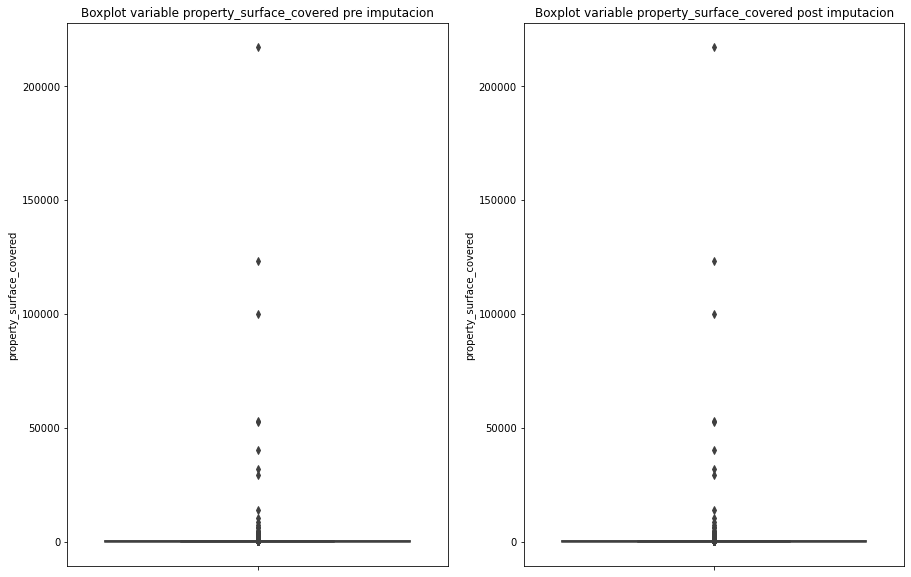

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
sns.boxplot(y="property_surface_covered", data=ds_copia_pre_imputacion, ax=axes[0]).set( title="Boxplot variable property_surface_covered pre imputacion")
sns.boxplot(y="property_surface_covered", data=ds_train, ax=axes[1]).set( title="Boxplot variable property_surface_covered post imputacion")


En este caso, al contrario de property_surface_total, no vemos en el grafico valores que llamen la atencion. 

In [94]:
promedio_pre_imputacion = ds_copia_pre_imputacion["property_surface_covered"].mean()
promedio_post_imputacion = ds_train["property_surface_covered"].mean()

print("El promedio pre imputacion de la variable property_surface_covered tiene un valor de: " + str(promedio_pre_imputacion))
print("El promedio post imputacion de la variable property_surface_covered tiene un valor de: " + str(promedio_post_imputacion))

El promedio pre imputacion de la variable property_surface_covered tiene un valor de: 88.65171329725385
El promedio post imputacion de la variable property_surface_covered tiene un valor de: 88.14380796447863


En este caso es lo contrario, el promedio post imputacion tiene un valor mas bajo, aunque muy pequeño.

## Analizar la existencia de valores atípicos


### Detectar valores atípicos en los datos en forma univariada


Vamos a analizar los valores atipicos de forma univariada con Z-score:

- Considereremos como outliers a las observaciones que posean 3 o mas desviaciones estandar de la media muestral
- Ese valor "3" es el umbral que elegimos para detectar outliers. Conocida como la "regla de oro"

In [95]:
umbral = 3

Calculo quantiles que me serviran en el analisis

In [96]:
columnas = ["property_rooms", "property_bedrooms","property_surface_total", "property_surface_covered", "property_price"]
ds_cuantitativo = ds_train.loc[:,columnas]
ds_rangos = pd.DataFrame()
ds_rangos["q1"] = ds_cuantitativo.quantile([.25]).iloc[0]
ds_rangos["q3"] = ds_cuantitativo.quantile([.75]).iloc[0]
ds_rangos["max_whisker"] = ds_rangos["q3"] + 1.5 * (ds_rangos["q3"] - ds_rangos["q1"])
ds_rangos

q1        q3  max_whisker
property_rooms                2.0       4.0          7.0
property_bedrooms             1.0       3.0          6.0
property_surface_total       45.0     105.0        195.0
property_surface_covered     40.0      88.0        160.0
property_price            95000.0  235000.0     445000.0

#### Analizamos property_rooms


In [97]:
ds_train['z_rooms'] = st.zscore(ds_train.property_rooms) 

ds_test['z_rooms'] = st.zscore(ds_test.property_rooms) 

 - Una vez realizado el calculo vemos aquellas muestras que no respetan la "regla de oro" 

In [98]:
ds_outliers_rooms = ds_train[ds_train['z_rooms'] > umbral ]
ds_outliers_rooms.head()

id    latitud   longitud  place_l3  \
9661    TCEygKmMJpgJFlJwCiCxtA== -34.563353 -58.444035  Belgrano   
201345  ly0uA+Y0jpQuLJZ2M9Kx2A== -34.651881 -58.409308   Pompeya   
197660  uql5GCuxeXbBP+7lL9fP2A== -34.591766 -58.391875  Recoleta   
331525  X9jsyknsuCuHNBef06vk7Q== -34.629600 -58.364400      Boca   
358714  nYi5e8OGk9yhdRzvQQHSbQ== -34.590923 -58.384214  Recoleta   

       property_type  property_rooms  property_bedrooms  \
9661    Departamento            12.0                5.0   
201345          Casa             9.0                8.0   
197660  Departamento             9.0                5.0   
331525  Departamento             8.0                6.0   
358714  Departamento             9.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
9661                435.000000                     435.0        850000.0   
201345              404.634203                     290.0        400000.0   
197660              404.038337                     330.0       1250000.0   
331525              166.000000                     144.0        190000.0   
358714              668.000000                     668.0       5000000.0   

         z_rooms  
9661    6.439138  
201345  4.332828  
197660  4.332828  
331525  3.630724  
358714  4.332828

Vemos si hay algun valor negativo

In [99]:
ds_train[ds_train['z_rooms'] < - umbral ]

Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms]
Index: []

Grafico Boxplot de variable property_rooms


[Text(0.5, 1.0, 'Boxplot variable property_rooms')]

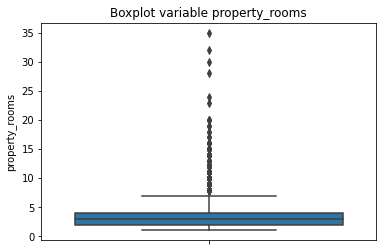

In [100]:
sns.boxplot(y=ds_train.property_rooms).set( title="Boxplot variable property_rooms")

Valor maximo de habitaciones antes de ser outlier

In [101]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable property_rooms antes de ser outlier en el grafico es: " + str(ds_rangos["max_whisker"][0]))

Podemos observar que el valor maximo que puede tomar un registro en la variable property_rooms antes de ser outlier en el grafico es: 7.0


Me fijo cantidad de property_rooms de los outliers detectados por z_score

In [102]:
ds_outliers_rooms["property_rooms"].value_counts()

8.0     277
9.0     134
10.0     80
12.0     35
11.0     26
14.0     17
15.0     11
13.0      8
16.0      5
20.0      3
19.0      2
18.0      2
17.0      2
32.0      1
28.0      1
30.0      1
24.0      1
35.0      1
23.0      1
Name: property_rooms, dtype: int64

Observamos los outliers despues de 7 habitaciones, son los valores que superan a los bigotes superiores e inferioires del grafico boxplot, en este caso solo superiores.
Vemos como coincide con los valores de los outliers detectados por z-score, en donde todos los outliers tienen un numero de habitaciones mayor a 7.

Cantidad de outliers detectada en la variable property_rooms

In [103]:
print("Detectamos un total de: " + str(ds_outliers_rooms.shape[0]) + " outliers en la variable property_rooms")

Detectamos un total de: 608 outliers en la variable property_rooms


#### Anlalizamos property_bedrooms


In [104]:
ds_train['z_bedrooms'] = st.zscore(ds_train.property_bedrooms)

ds_test['z_bedrooms'] = st.zscore(ds_test.property_bedrooms)

Una vez realizado el calculo vemos aquellas muestras que no respetan la "regla de oro" y sean posibles outliers


In [105]:
ds_outliers_bedrooms = ds_train[ds_train['z_bedrooms'] > umbral ]
ds_outliers_bedrooms.head()

id    latitud   longitud       place_l3  \
346603  MDtiovMcMxbXApyTjedCYw== -34.609960 -58.401123           Once   
340949  3ROCXQFGXH3kIo1a1gKziA== -34.579491 -58.475587  Villa Ortuzar   
236625  7Vy9T85s+VPO0oxyHREucw== -34.626670 -58.439150      Caballito   
201345  ly0uA+Y0jpQuLJZ2M9Kx2A== -34.651881 -58.409308        Pompeya   
130208  aDyZI32jYV/LuQdSHQRAOQ== -34.604930 -58.440416   Villa Crespo   

       property_type  property_rooms  property_bedrooms  \
346603  Departamento             7.0                6.0   
340949          Casa             7.0                6.0   
236625          Casa             7.0                6.0   
201345          Casa             9.0                8.0   
130208          Casa             5.0                8.0   

        property_surface_total  property_surface_covered  property_price  \
346603              244.000000                     244.0        260000.0   
340949              243.860483                     160.0        380000.0   
236625              300.285551                     215.0        430000.0   
201345              404.634203                     290.0        400000.0   
130208              540.000000                     540.0        690000.0   

         z_rooms  z_bedrooms  
346603  2.928621    3.625258  
340949  2.928621    3.625258  
236625  2.928621    3.625258  
201345  4.332828    5.397901  
130208  1.524414    5.397901

Vemos si hay algun valor con z < - 3

In [106]:
ds_outliers_bedrooms[ds_outliers_bedrooms['z_bedrooms'] < -umbral ]

Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, z_bedrooms]
Index: []

Grafico


[Text(0.5, 1.0, 'Boxplot variable property_bedrooms')]

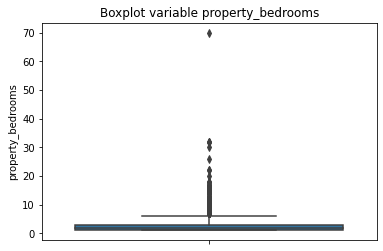

In [107]:
sns.boxplot(y=ds_train.property_bedrooms).set( title="Boxplot variable property_bedrooms")

A la vista podemos ver un valor que sobresale del resto por mucho, una propiedad con 70 dormitorios

Valor maximo de dormitorios antes de ser outlier

In [108]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable property_bedrooms antes de ser outlier en el grafico es: " + str(ds_rangos["max_whisker"][1])) 

Podemos observar que el valor maximo que puede tomar un registro en la variable property_bedrooms antes de ser outlier en el grafico es: 6.0


Vemos la cantidad de dormitorios que poseen las propiedades que fueron detectadas como outliers por z-score

In [109]:
ds_outliers_bedrooms.property_bedrooms.value_counts()

6.0     183
7.0      89
8.0      48
9.0      24
10.0     23
12.0     16
11.0      8
16.0      6
14.0      5
15.0      4
13.0      3
18.0      3
17.0      3
32.0      3
22.0      2
70.0      1
20.0      1
26.0      1
30.0      1
Name: property_bedrooms, dtype: int64

Vemos que los outliers detectados por el meotodo z-score tienen 6 o mas habitaciones, coincidente con el grafico Boxplot

In [110]:
print("Detectamos un total de: " + str(ds_outliers_bedrooms.shape[0]) + " outliers en la variable property_bedrooms")

Detectamos un total de: 424 outliers en la variable property_bedrooms


#### Analizamos property_surface_total


In [111]:
ds_train['z_surface_total'] = st.zscore(ds_train.property_surface_total)

ds_test['z_surface_total'] = st.zscore(ds_test.property_surface_total)

Una vez realizado el calculo vemos aquellas muestras que no respetan la "regla de oro" y sean posibles outliers


In [112]:
ds_outliers_surface_total = ds_train[ds_train['z_surface_total'] > umbral ]
ds_outliers_surface_total.head()

id    latitud   longitud      place_l3  \
370919  9p8XKpRRE9vzUT7Y/5FZ7Q== -34.571747 -58.422612       Palermo   
370921  DhCI1Vz1PAu5fOy930TFXw== -34.571747 -58.422612       Palermo   
459842  Y4PuRUaAW17tsLGwFTukhA== -34.628397 -58.437706     Caballito   
84073   vMD1fCSS0kedOs8Bk/PCjA== -34.588175 -58.396261      Recoleta   
106598  +YPtNPAzbhoDCLgqF26Q8A== -34.587320 -58.401556  Barrio Norte   

       property_type  property_rooms  property_bedrooms  \
370919  Departamento             5.0                4.0   
370921  Departamento             5.0                4.0   
459842  Departamento             3.0                2.0   
84073   Departamento             1.0                1.0   
106598  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
370919                 42110.0                     307.0       3044250.0   
370921                 42110.0                     307.0       2890500.0   
459842                  8136.0                    6472.0        203550.0   
84073                  36000.0                      30.0         90000.0   
106598                 56740.0                   52540.0        175000.0   

         z_rooms  z_bedrooms  z_surface_total  
370919  1.524414    1.852615        31.109466  
370921  1.524414    1.852615        31.109466  
459842  0.120207    0.079971         5.942082  
84073  -1.284000   -0.806350        26.583278  
106598 -0.581897   -0.806350        41.947131

Verificamos si hay algun valor tal que z < -3

In [113]:
ds_train[ds_train['z_surface_total'] < -umbral ]

Empty DataFrame
Columns: [id, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, z_bedrooms, z_surface_total]
Index: []

Grafico


[Text(0.5, 1.0, 'Boxplot variable property_surface_total')]

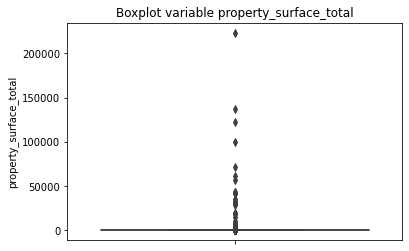

In [114]:
sns.boxplot(y=ds_train.property_surface_total).set( title="Boxplot variable property_surface_total")

Vemos como casi lo unico que se observa en el grafico son valores atipicos, esto sucede dado a que hay outliers con valores muy elevados, como por ejemplo la propiedad con una superficie total de 200000 metros cuadrados

Busco valor minimo y maximo de los outliers

In [115]:
print("Valor maximo de los outliers en la variable property_surface_total es: " + str(ds_outliers_surface_total.property_surface_total.max()))
print("Valor minimo de los outliers en la variable property_surface_total es: " + str(ds_outliers_surface_total.property_surface_total.min()))

Valor maximo de los outliers en la variable property_surface_total es: 223402.59621687402
Valor minimo de los outliers en la variable property_surface_total es: 4224.0


Cantidad de outliers 

In [116]:
print("La cantidad de outliers detectados en la variable property_surface_total es: " + str(ds_outliers_surface_total.shape[0]))

La cantidad de outliers detectados en la variable property_surface_total es: 42


#### Analizamos property_surface_covered


In [117]:
ds_train['z_surface_covered']=st.zscore(ds_train.property_surface_covered)

ds_test['z_surface_covered']=st.zscore(ds_test.property_surface_covered)

Una vez realizado el calculo vemos aquellas muestras que no respetan la "regla de oro" y sean posibles outliers


In [118]:
ds_outliers_surface_covered = ds_train[ds_train['z_surface_covered'] > umbral ]
ds_outliers_surface_covered.head()

id    latitud   longitud      place_l3  \
459842  Y4PuRUaAW17tsLGwFTukhA== -34.628397 -58.437706     Caballito   
106598  +YPtNPAzbhoDCLgqF26Q8A== -34.587320 -58.401556  Barrio Norte   
459847  zMligt7YdiayCjrfqlmbfg== -34.628247 -58.437696     Caballito   
352883  aBZBrjan1XqHjgvjHK6K6Q== -34.550093 -58.483034      Saavedra   
293109  tB9+CF2yPvyRqYvdI5wVqg== -34.603310 -58.419520       Almagro   

       property_type  property_rooms  property_bedrooms  \
459842  Departamento             3.0                2.0   
106598  Departamento             2.0                1.0   
459847  Departamento             4.0                3.0   
352883  Departamento             1.0                1.0   
293109  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
459842                  8136.0               6472.000000        203550.0   
106598                 56740.0              52540.000000        175000.0   
459847                 18096.0               8568.000000        324558.0   
352883                 29064.0              29064.000000         87400.0   
293109                  5239.0               3377.316631        119000.0   

         z_rooms  z_bedrooms  z_surface_total  z_surface_covered  
459842  0.120207    0.079971         5.942082           5.986532  
106598 -0.581897   -0.806350        41.947131          49.187311  
459847  0.822310    0.966293        13.320287           7.952079  
352883 -1.284000   -0.806350        21.445202          27.172431  
293109  0.120207    0.079971         3.796031           3.084458

Grafico


[Text(0.5, 1.0, 'Boxplot variable property_surface_covered')]

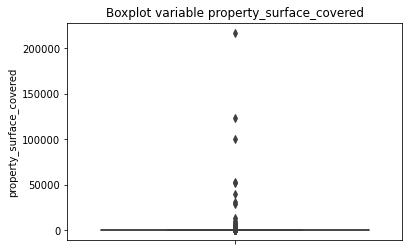

In [119]:
sns.boxplot(y=ds_train.property_surface_covered).set( title="Boxplot variable property_surface_covered")

Al igual que el grafico de surface_total, los outliers tienen valores tan grandes que es casi lo unico que se ve en el grafico. Por ejemplo ese valor atipico de valor mayor a 200.000

Buscamos valores maximos y minimos de los outliers

In [120]:
print("Valor maximo de los outliers en la variable property_surface_covered es: " + str(ds_outliers_surface_covered.property_surface_covered.max()))
print("Valor minimo de los outliers en la variable property_surface_covered es: " + str(ds_outliers_surface_covered.property_surface_covered.min()))

Valor maximo de los outliers en la variable property_surface_covered es: 217000.0
Valor minimo de los outliers en la variable property_surface_covered es: 3367.0


Calculamos la cantidad de outliers detectados

In [121]:
print("La cantidad de outliers detectados en la variable property_surface_covered es: " + str(ds_outliers_surface_covered.shape[0]))

La cantidad de outliers detectados en la variable property_surface_covered es: 23


#### Analizamos property_price


In [122]:
ds_train['z_price']=st.zscore(ds_train.property_price)
ds_test['z_price']=st.zscore(ds_test.property_price)

Una vez realizado el calculo vemos aquellas muestras que no respetan la "regla de oro" y sean posibles outliers


In [123]:
ds_outliers_price = ds_train[ds_train['z_price'] > umbral ]
ds_outliers_price.head()

id    latitud   longitud       place_l3  \
210381  62V2JTkvuT71B4m4dKPPKg== -34.614981 -58.362643  Puerto Madero   
224133  BG9+Nmw/s3ckVwvCL222VA== -34.568032 -58.441285       Belgrano   
229380  fPoNB32MDftGTgx5mOBLpw== -34.611244 -58.360546  Puerto Madero   
301217  Jpxmesqoj2ier2qdHM6+bw== -34.613289 -58.362148  Puerto Madero   
275653  QqMK+6CGm+dw4ePOYdK1YQ== -34.603362 -58.364035  Puerto Madero   

       property_type  property_rooms  property_bedrooms  \
210381  Departamento             6.0                5.0   
224133          Casa             6.0                5.0   
229380  Departamento             4.0                2.0   
301217  Departamento             3.0                2.0   
275653  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
210381                   500.0                     470.0       2950000.0   
224133                   550.0                     550.0       1580000.0   
229380                   220.0                     220.0       1680000.0   
301217                   466.0                     319.0       3000000.0   
275653                   346.0                     328.0       2000000.0   

         z_rooms  z_bedrooms  z_surface_total  z_surface_covered   z_price  
210381  2.226517    2.738936         0.285458           0.358090  8.515923  
224133  2.226517    2.738936         0.322497           0.433111  4.235780  
229380  0.822310    0.079971         0.078038           0.123650  4.548199  
301217  0.120207    0.079971         0.260271           0.216488  8.672133  
275653  0.822310    0.966293         0.171377           0.224928  5.547941

Verificamos si hay algun valor tal que z < -3

In [124]:
ds_outliers_price = ds_train[ds_train['z_price'] < -umbral ]

Grafico


[Text(0.5, 1.0, 'Boxplot variable property_price')]

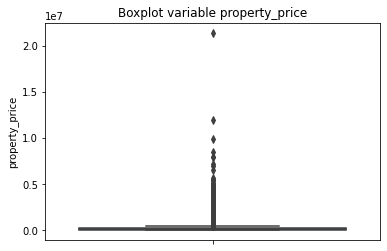

In [125]:
sns.boxplot(y=ds_train.property_price).set( title="Boxplot variable property_price")

Valor maximo en el grafico antes de ser outlier

In [126]:
print("Podemos observar que el valor maximo que puede tomar un registro en la variable property_rooms antes de ser outlier en el grafico es: " + str(ds_rangos["max_whisker"][4]))

Podemos observar que el valor maximo que puede tomar un registro en la variable property_rooms antes de ser outlier en el grafico es: 445000.0


Vemos la cantidad de outliers detectados con z-score property_price

In [127]:
print("Detectamos un total de: " + str(ds_outliers_price.shape[0]) + " outliers en la variable property_price")

Detectamos un total de: 0 outliers en la variable property_price


Valor maximo y minimo de los outliers

In [128]:
print("Valor maximo de los outliers en la variable property_price es: " + str(ds_outliers_price.property_price.max()))
print("Valor minimo de los outliers en la variable property_price es: " + str(ds_outliers_price.property_price.min()))

Valor maximo de los outliers en la variable property_price es: nan
Valor minimo de los outliers en la variable property_price es: nan


### Detectar valores atípicos en los datos en forma multivariada


- Para detectar valores atipicos multivariados vamos a utilizar el metodo de Isolation forest


Guardo los datasets con las columnas que agregamos en el punto anterior y elimino dichas columnas del dataset de train y test

In [129]:
#perservo datasets con columnas z_score
ds_train_zscore = ds_train.copy()
ds_test_zscore = ds_test.copy()

#elimino de los datasets originales las columnas anadidas
columnas_zscore = ["z_rooms", "z_bedrooms", "z_surface_total", "z_surface_covered", "z_price"]

ds_train.drop(columns = columnas_zscore, inplace=True)
ds_test.drop(columns = columnas_zscore, inplace=True)

Preparo dataset para isolation forest, elimino la variable "place_l3" dado que no es un valor numerico y de otra manera el dataset tendria muchas columnas

In [130]:
columnas_isolationforest_a_eliminar = ["place_l3", "id"]

#guardamos columna ID 
columna_id_train = ds_train["id"]
columna_id_test = ds_test["id"]

ds_train_iforest = ds_train.drop(columns = columnas_isolationforest_a_eliminar)
ds_test_iforest = ds_test.drop(columns = columnas_isolationforest_a_eliminar)


Dummies para columna property_type

In [131]:
ds_train_iforest = pd.get_dummies(ds_train_iforest, columns=['property_type'])
ds_test_iforest = pd.get_dummies(ds_test_iforest, columns=['property_type'])

In [132]:
ds_train_iforest.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965             2.0                1.0   
256350 -34.580088 -58.424965             2.0                1.0   
135168 -34.551481 -58.452358             1.0                1.0   
227831 -34.632290 -58.464844             5.0                3.0   
409101 -34.549279 -58.463074             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
280087                    53.0                      49.0         80000.0   
256350                    35.0                      35.0         79900.0   
135168                    25.0                      20.0         69000.0   
227831                    75.0                      75.0        150000.0   
409101                    46.0                      34.0         85000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  
280087                   0                           1                 0  
256350                   0                           1                 0  
135168                   0                           1                 0  
227831                   0                           1                 0  
409101                   0                           1                 0

Utilizamos el metodo de Isolation Forest


In [133]:
from sklearn.ensemble import IsolationForest
#Creo el modelo
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=8, 
                          bootstrap=False, n_jobs=-1, random_state=1)

Entreno y genero la predicción


In [134]:
pred_train = iforest.fit_predict(ds_train_iforest)
pred_test  = iforest.predict(ds_test_iforest)

Cargo las etiquetas a los datasets

In [135]:
ds_train_iforest['scores']=iforest.decision_function(ds_train_iforest)
ds_train_iforest['outlier_label'] = pred_train

ds_test_iforest['scores']=iforest.decision_function(ds_test_iforest)
ds_test_iforest['outlier_label'] = pred_test

Los registros etiquetados con "-1" son considerados como outliers

In [136]:
ds_train_iforest[ds_train_iforest.outlier_label == -1].head()

latitud   longitud  property_rooms  property_bedrooms  \
210381 -34.614981 -58.362643             6.0                5.0   
413132 -34.589588 -58.431352             5.0                3.0   
401702 -34.593098 -58.390295             7.0                5.0   
9661   -34.563353 -58.444035            12.0                5.0   
224133 -34.568032 -58.441285             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
210381                   500.0                     470.0       2950000.0   
413132                   290.0                     230.0        815000.0   
401702                   624.0                     624.0       1111111.0   
9661                     435.0                     435.0        850000.0   
224133                   550.0                     550.0       1580000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  \
210381                   0                           1                 0   
413132                   1                           0                 0   
401702                   0                           1                 0   
9661                     0                           1                 0   
224133                   1                           0                 0   

          scores  outlier_label  
210381 -0.101186             -1  
413132 -0.019196             -1  
401702 -0.086582             -1  
9661   -0.066448             -1  
224133 -0.114053             -1

In [137]:
#guardo indices de outliers para mas adelante
indice_outliers_iforest_train = ds_train_iforest[ds_train_iforest.outlier_label == -1].index.to_list()

Cuento la cantidad de observaciones anomalas


In [138]:
cant_outliers_train = ds_train_iforest.outlier_label.value_counts().to_frame().outlier_label[-1]
cant_outliers_test = ds_test_iforest.outlier_label.value_counts().to_frame().outlier_label[-1]

print("La cantidad de outliers detectados en el dataset de train es: " + str(cant_outliers_train))
print("La cantidad de outliers detectados en el dataset de test es: " + str(cant_outliers_test))

La cantidad de outliers detectados en el dataset de train es: 3612
La cantidad de outliers detectados en el dataset de test es: 885


Visualizamos uno de los clasificadores de los 100 estimadores que elegimos, para ver como clasifica

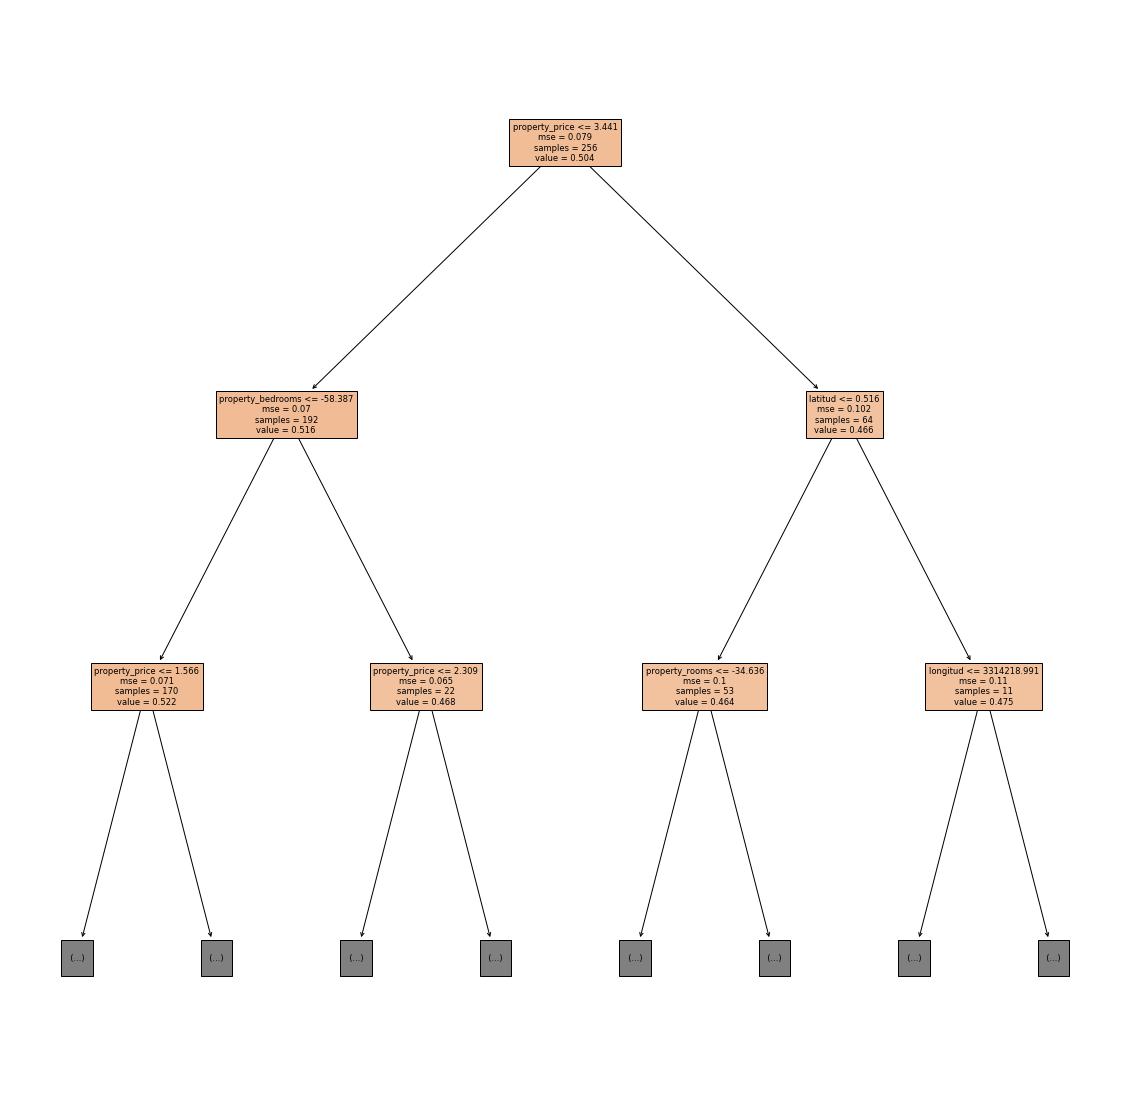

In [139]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(20,20))
sk.tree.plot_tree(estimator,feature_names=ds_train_iforest.columns,filled=True,max_depth=2)
plt.show()

#### Graficos de valores atipicos relacionando las columnas del dataset


#### property_price vs property_rooms


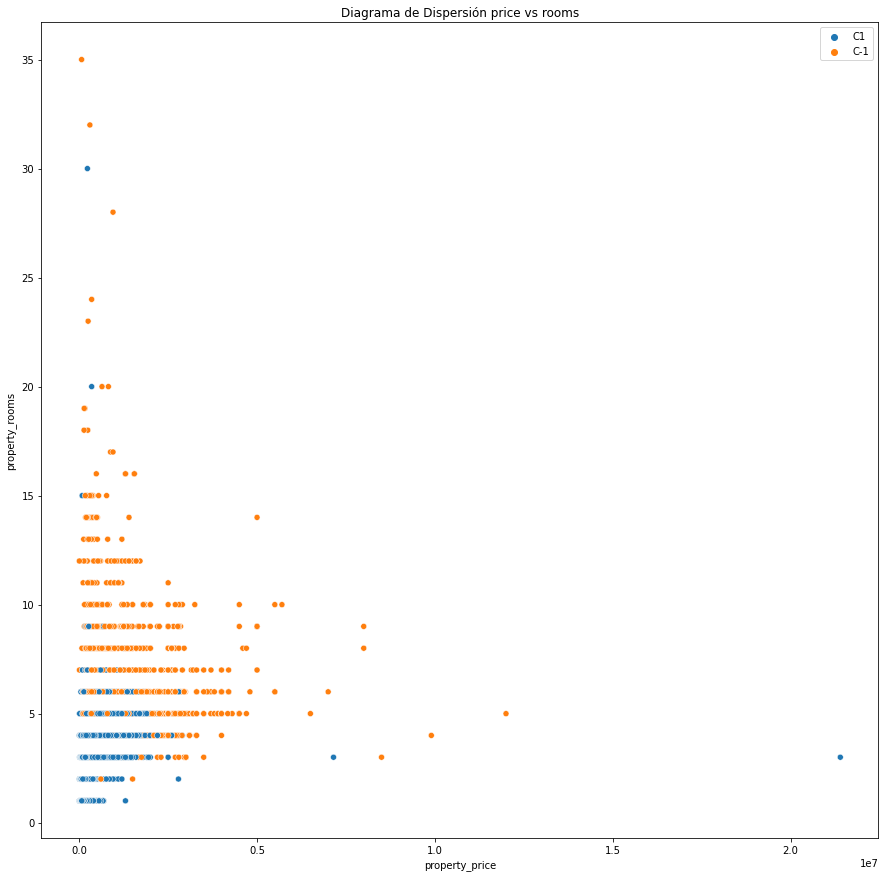

In [140]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_price'],y=ds_train_iforest['property_rooms'],hue=color)
plt.title('Diagrama de Dispersión price vs rooms')
plt.show()

Podemos observar que la mayor densidad de outliers (c-1) se encuentran en donde una propiedad tiene muchas habitaciones (mas de 7). Con respecto a los valores normales, se puede observar que la mayoria esta dentro de un rango de 5 habitaciones y con un precio relativamente bajo.

#### property_bedrooms vs property_rooms


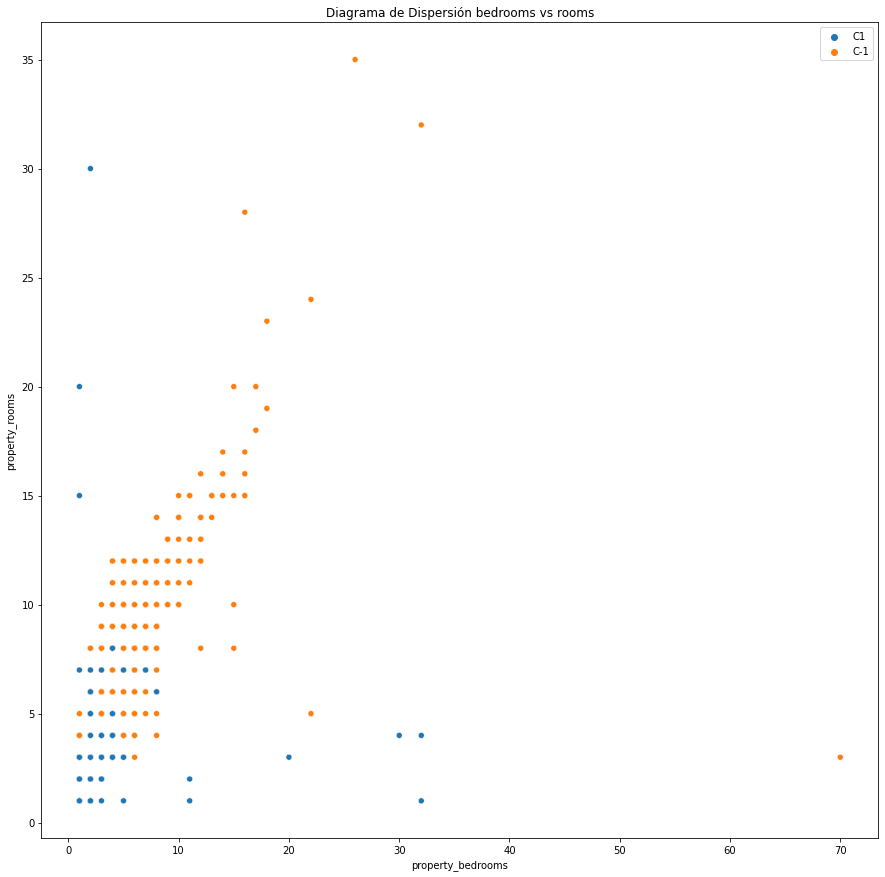

In [141]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_bedrooms'],y=ds_train_iforest['property_rooms'],hue=color)
plt.title('Diagrama de Dispersión bedrooms vs rooms')
plt.show()

Se puede observar una correlacion positiva respecto a estas variables, como analizamos anteriormente.  
Observamos muchos outliers con habitaciones y dormitorios de mas de 6 unidades, los valores considerados outliers estan mas bien en la parte "baja" del grafico.
Notamos par de excepciones, como las prpiedades que tienen 30/35 dormitorios y 5 habitaciones, como tambien, 15 habitaciones y 3 dormitorios 

#### property_price vs property_surface_covered


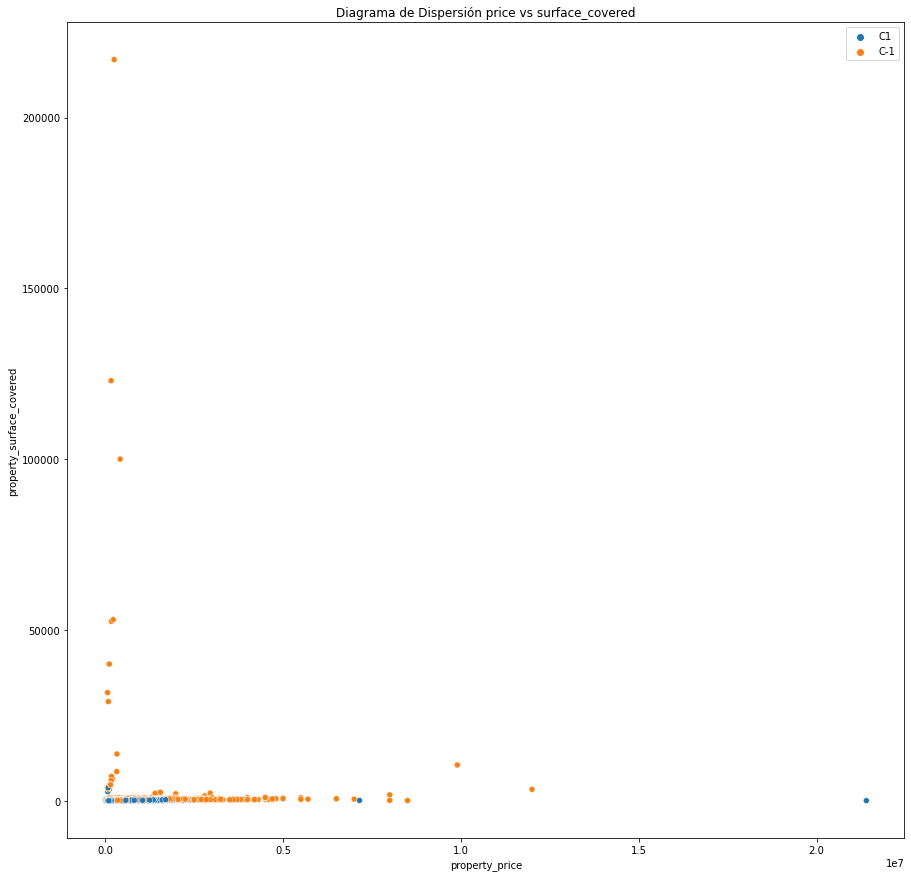

In [142]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_price'],y=ds_train_iforest['property_surface_covered'],hue=color)
plt.title('Diagrama de Dispersión price vs surface_covered')
plt.show()

Notamos que los valores no atipicos se mantiene en valores bajos de property_price y property_surface_covered,a medida que nos movemos de los ejes, los valores se tornan atipicos. 

Los valores extremos hacen que el grafico este muy concentrado

#### property_price vs property_surface_total


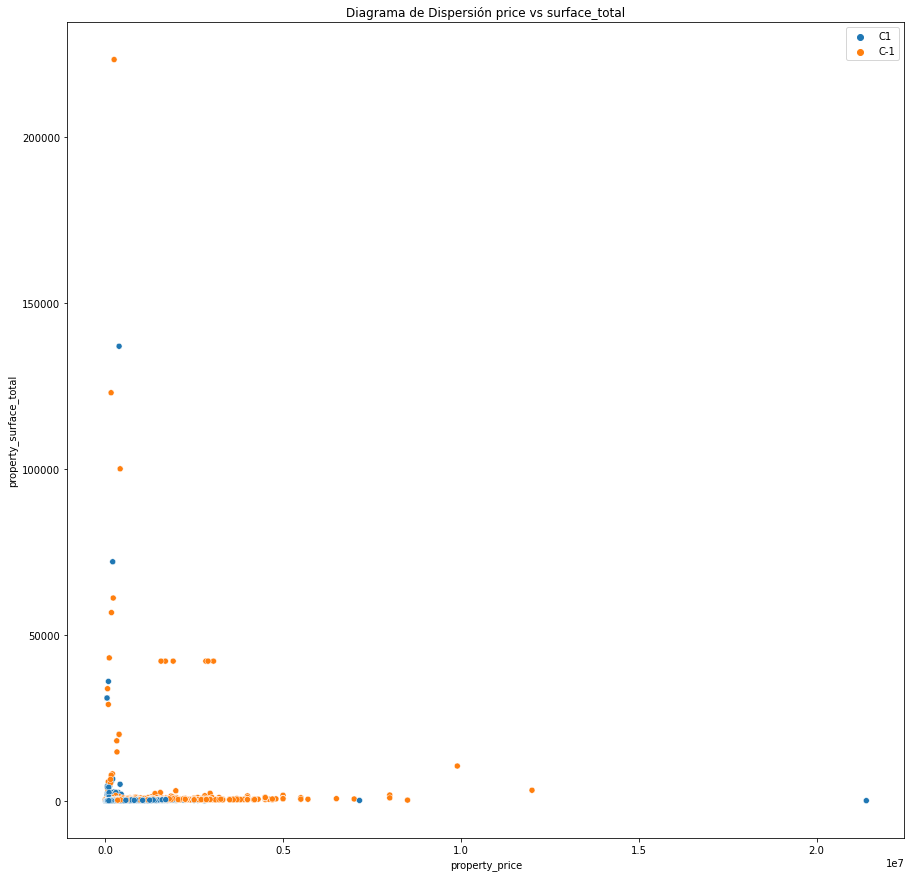

In [143]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_price'],y=ds_train_iforest['property_surface_total'],hue=color)
plt.title('Diagrama de Dispersión price vs surface_total')
plt.show()

Notamos que los valores no atipicos se mantiene en valores bajos de property_price y property_surface_covered,a medida que nos movemos de los ejes, los valores se tornan atipicos. 

Hay algunos valores extremos que no son atipicos, como propiedades muy caras con bajo property_surface_total y viceversa

Los valores extremos hacen que el grafico este muy concentrado

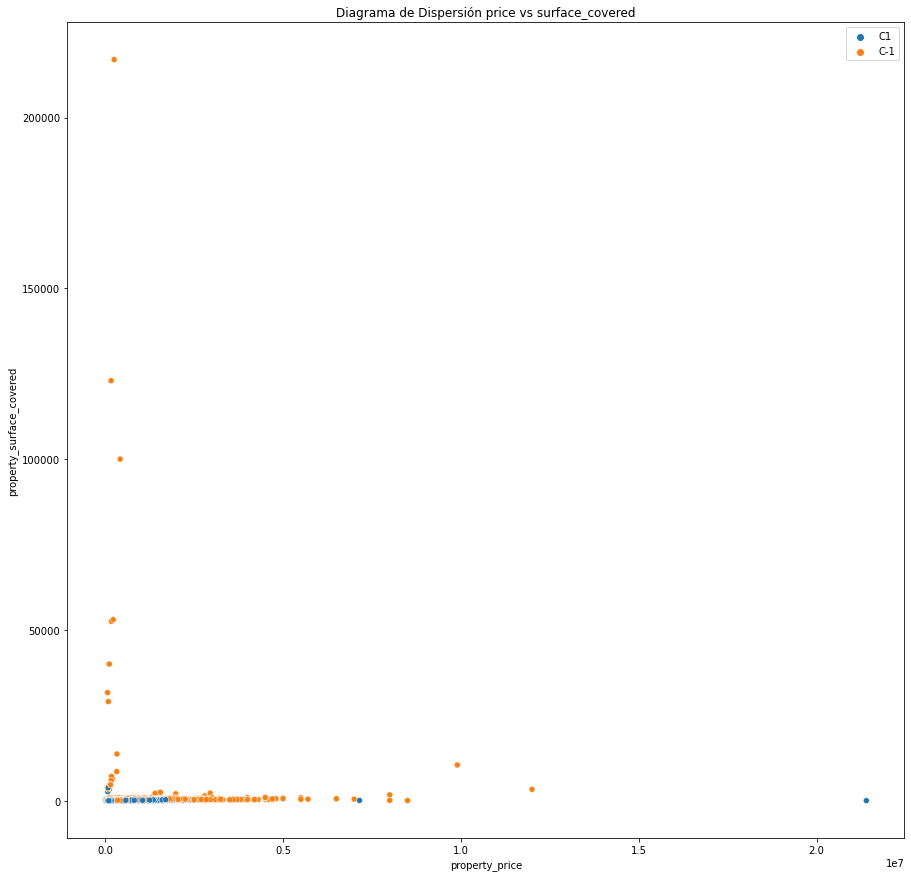

In [144]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_price'],y=ds_train_iforest['property_surface_covered'],hue=color)
plt.title('Diagrama de Dispersión price vs surface_covered')
plt.show()

#### property_surface_total vs property_suface_covered

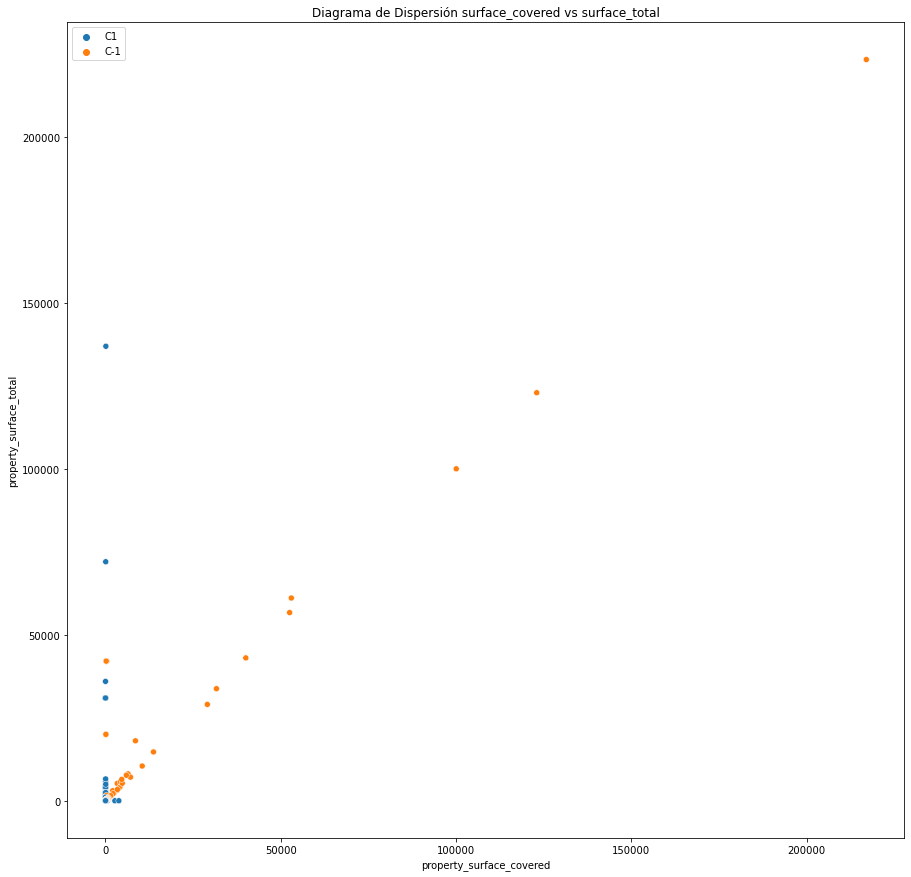

In [145]:
#Grafico dispersograma
color=[f"C{n}" for n in (ds_train_iforest['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest['property_surface_covered'],y=ds_train_iforest['property_surface_total'],hue=color)
plt.title('Diagrama de Dispersión surface_covered vs surface_total')
plt.show()

### Caracterisicas de los datos atipicos detectados

- Los datos atipicos encontrados de forma univariada tienen la caracteristica que tiene tres o mas desviaciones estándar de la media muestral, por ejemplo una propiedad superior 7 habitaciones, una propiedad con precio superior a $432500 dolares etc.
- Los datos atipicos detectados de forma multivariada, tienen la caracteristica de ser un valor extremo, pero cuando se lo considera con otra variable, por ejemplo si un departamento tiene un precio extremadamente alto y solo 1 habitacion, o en el caso contrario, de ser un departamento de 10 habitaciones con un precio muy bajo.

### Características y tratamientos de los datos atípicos detectados.


Con los analisis univariados y multivariados que analizamos, concluimos que la mayoria de los datos atipicos los encontramos en valores relacionados con las variables "property_bedrooms", "property_rooms" y "property_price".

Luego de los distintos análisis del dataset pudimos obvservar que al aplicar el método univariado encontramos aquellos outliers con valores extremos en relación a cada columna en particular. En cambio, al implementar el modelo de Isolation Forest para valores atípicos multivariados obtuvimos otras muestras a tener en cuenta como outliers para un mejor tratamiento de los mismos.

Decidimos eliminar aquellos valores atipicos que encontramos tanto en el metodo univariado como en el multivariado, esta decision la tomamos debido a que la cantidad de registros detectados como outliers no es un numero significativo para dañar el analisis sobre el mismo.

verifico tamano de los datasets train test pre depuracion 

In [146]:
print("Tamanio dataset ds_train pre depuracion: " + str(ds_train.shape))
print("Tamanio dataset ds_test pre depuracion: " + str(ds_test.shape))

Tamanio dataset ds_train pre depuracion: (72239, 10)
Tamanio dataset ds_test pre depuracion: (18084, 10)


In [147]:
from collections import OrderedDict
from iteration_utilities import duplicates # hay que instalar iteration_utilities "pip install iteration_utilities"
from iteration_utilities import unique_everseen

def eliminacion_outliers(dataset_zscore, dataset_iforest, dataset_a_depurar):

    #obtencion indices outliers univariados
    indice_price = dataset_zscore[dataset_zscore['z_price'] > 3 ].index.to_list()
    indice_bedrooms = dataset_zscore[dataset_zscore['z_bedrooms'] > 3 ].index.to_list()
    indice_rooms = dataset_zscore[dataset_zscore['z_rooms'] > 3 ].index.to_list()
    indice_surface_covered = dataset_zscore[dataset_zscore['z_surface_covered'] > 3 ].index.to_list()
    indice_surface_total = dataset_zscore[dataset_zscore['z_surface_total'] > 3 ].index.to_list()

    #obtencion indices outliers multivariados
    indice_multi_variable = dataset_iforest[dataset_iforest.outlier_label==-1].index.to_list()

    indices_a_eliminar = indice_price + indice_bedrooms + indice_rooms + indice_surface_covered + indice_surface_total
    indices_a_eliminar = indices_a_eliminar + indice_multi_variable
    indices_a_eliminar = set(indices_a_eliminar)
    print("cantidad de elementos a eliminar: " + str(len(indices_a_eliminar)))

    #eliminacion dataset
    dataset_a_depurar.drop(index = indices_a_eliminar, inplace = True)
    return indices_a_eliminar

#colocamos las columnas de id
ds_train["id"] = columna_id_train
ds_test["id"] = columna_id_test

indices_a_eliminar_train = eliminacion_outliers(ds_train_zscore, ds_train_iforest, ds_train)
indices_a_eliminar_test = eliminacion_outliers(ds_test_zscore, ds_test_iforest, ds_test)

cantidad de elementos a eliminar: 4227
cantidad de elementos a eliminar: 1075


verifico tamano de los datasets train test post depuracion 

In [148]:
print("Tamanio dataset ds_train post depuracion: " + str(ds_train.shape))
print("Tamanio dataset ds_test post depuracion: " + str(ds_test.shape))

Tamanio dataset ds_train post depuracion: (68012, 10)
Tamanio dataset ds_test post depuracion: (17009, 10)


### Analizar la relación entre el precio de venta y los metros de superficie


volvemos a hacer el analisis despues de la depuracion


In [149]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=8, 
                          bootstrap=False, n_jobs=-1, random_state=1)

Preparo datasets para isolation forest

Eliminamos la columna place_l3 por razones previamente explicadas

In [150]:
columnas_isolationforest_a_eliminar = ["place_l3", "id"]

ds_train_iforest2 = ds_train.drop(columns = columnas_isolationforest_a_eliminar)
ds_test_iforest2 = ds_test.drop(columns = columnas_isolationforest_a_eliminar)

aplico Dummies a la variable property_type

In [151]:
ds_train_iforest2 = pd.get_dummies(ds_train_iforest2, columns=['property_type'])

Entreno y genero la predicción


In [152]:
pred = iforest.fit_predict(ds_train_iforest2)

In [153]:
ds_train_iforest2['scores'] = iforest.decision_function(ds_train_iforest2)
ds_train_iforest2['outlier_label'] = pred

Los registros etiquetados con "-1" son considerados como outliers

In [154]:
ds_train_iforest2[ds_train_iforest2.outlier_label==-1]

latitud   longitud  property_rooms  property_bedrooms  \
270830 -34.634156 -58.489983             4.0                3.0   
354298 -34.592287 -58.384295             5.0                4.0   
251584 -34.587275 -58.513193             5.0                3.0   
349977 -34.594751 -58.393546             5.0                4.0   
363217 -34.601387 -58.373837             6.0                5.0   
...           ...        ...             ...                ...   
89975  -34.644718 -58.415658             3.0                2.0   
378675 -34.639855 -58.455735             4.0                3.0   
374238 -34.630471 -58.483337             4.0                3.0   
407577 -34.629721 -58.500441             5.0                3.0   
416301 -34.578182 -58.505543             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
270830              128.000000                     128.0        183000.0   
354298              254.000000                     245.0        750000.0   
251584              173.000000                     153.0        320000.0   
349977              270.000000                     265.0        669000.0   
363217              322.908852                     250.0        320000.0   
...                        ...                       ...             ...   
89975               211.000000                     145.0        168000.0   
378675              178.000000                     127.0        235000.0   
374238              218.708922                     175.0        185000.0   
407577              143.000000                     143.0        205000.0   
416301              168.000000                     147.0        390000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  \
270830                   1                           0                 0   
354298                   0                           1                 0   
251584                   0                           0                 1   
349977                   0                           1                 0   
363217                   0                           1                 0   
...                    ...                         ...               ...   
89975                    0                           0                 1   
378675                   1                           0                 0   
374238                   0                           0                 1   
407577                   1                           0                 0   
416301                   0                           0                 1   

          scores  outlier_label  
270830 -0.047072             -1  
354298 -0.033687             -1  
251584 -0.035223             -1  
349977 -0.036346             -1  
363217 -0.095279             -1  
...          ...            ...  
89975  -0.027174             -1  
378675 -0.052740             -1  
374238 -0.019874             -1  
407577 -0.084809             -1  
416301 -0.012056             -1  

[3401 rows x 12 columns]

cantidad de obs. anómalas


In [155]:
ds_train_iforest2.outlier_label.value_counts()

 1    64611
-1     3401
Name: outlier_label, dtype: int64

In [156]:
outliers_detectados = ds_train_iforest2.outlier_label.value_counts()[-1]
print("Se detectaron " + str(outliers_detectados) + " nuevos outliers")

Se detectaron 3401 nuevos outliers


Los outliers en casos multivariados como los que analizamos previamente, pueden provocar un efecto de enmascaramietno que se produce cuando un grupo de outliers esconden a otros. Es decir, los outliers enmascarados se haran visibles cuando se eliminen los outliers que los esconden.
En nuestro caso, observamos como al eliminar la primer tanda de valores atipicos y realizar el analisis nuevamente, encontramos nuevos outliers.


In [157]:
ds_atipicos_if2 = ds_train_iforest2[ds_train_iforest2["outlier_label"] == -1]

In [158]:

mean = ds_atipicos_if2["property_price"].mean()
maxi = ds_atipicos_if2["property_price"].max()
mini = ds_atipicos_if2["property_price"].min()

print("El valor maximo los nuevos outliers de property_price es: " + str(maxi))
print("El valor minimo los nuevos outliers de property_price es: " + str(mini))
print("El valor promedio los nuevos outliers de property_price es: " + str(mean))

El valor maximo los nuevos outliers de property_price es: 1170000.0
El valor minimo los nuevos outliers de property_price es: 11000.0
El valor promedio los nuevos outliers de property_price es: 351957.52749191417


In [159]:
ds_atipicos_if2["property_price"].describe()

count    3.401000e+03
mean     3.519575e+05
std      2.833430e+05
min      1.100000e+04
25%      1.580000e+05
50%      2.500000e+05
75%      4.300000e+05
max      1.170000e+06
Name: property_price, dtype: float64

In [160]:
mean = ds_atipicos_if2["property_surface_total"].mean()
maxi = ds_atipicos_if2["property_surface_total"].max()
mini = ds_atipicos_if2["property_surface_total"].min()

print("El valor maximo los nuevos outliers de property_surface_total es: " + str(maxi))
print("El valor minimo los nuevos outliers de property_surface_total es: " + str(mini))
print("El valor promedio los nuevos outliers de property_surface_total es: " + str(mean))

El valor maximo los nuevos outliers de property_surface_total es: 663.0
El valor minimo los nuevos outliers de property_surface_total es: 12.676168702277137
El valor promedio los nuevos outliers de property_surface_total es: 176.08448760881532


In [161]:
ds_atipicos_if2["property_surface_total"].describe()

count    3401.000000
mean      176.084488
std        79.452839
min        12.676169
25%       124.000000
50%       173.000000
75%       231.000000
max       663.000000
Name: property_surface_total, dtype: float64

Claramente los valores atipicos nuevos estan mas planchados que los outliers detectados previamente, dado que la capa de outliers que se detecto al principio poseian valores mas extremos

Grafico dispersograma


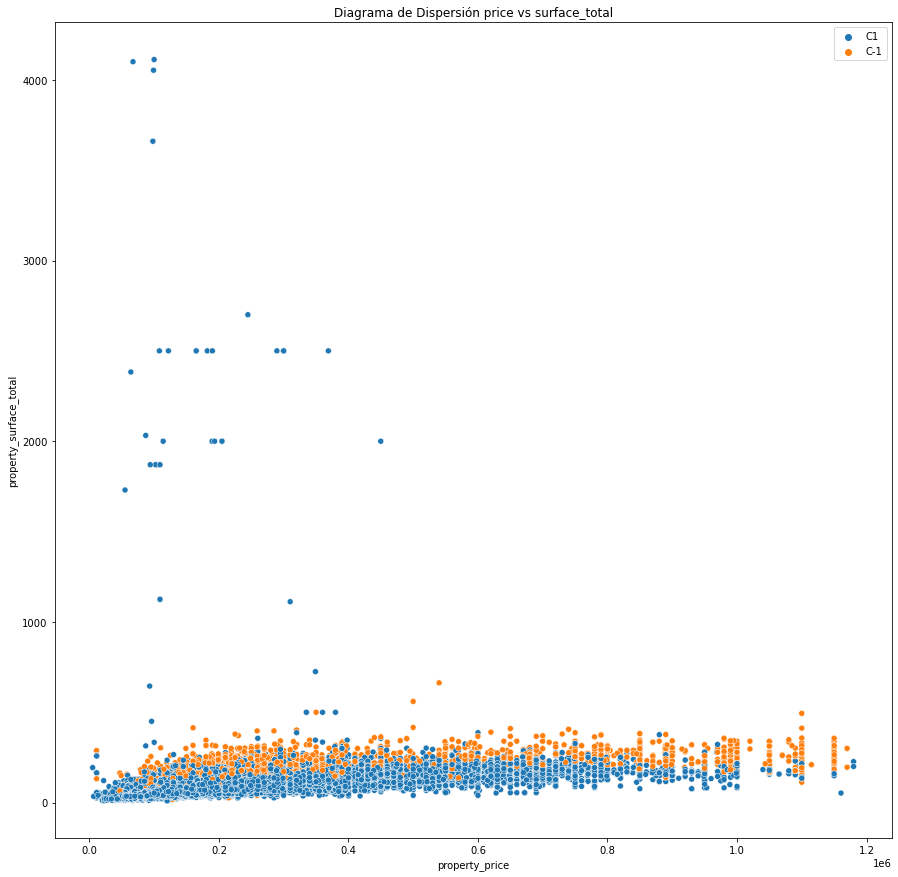

In [162]:
color=[f"C{n}" for n in (ds_train_iforest2['outlier_label'].values)]

plt.figure(figsize=(15,15))
sns.scatterplot(x=ds_train_iforest2['property_price'],y=ds_train_iforest2['property_surface_total'],hue=color)
plt.title('Diagrama de Dispersión price vs surface_total')
plt.show()

 - Vemos como a medida que nos movemos en el eje del precio hacia la derecha y nos mantenemos constante en el eje de la superficie, la cantidad de outliers aumenta considerablemente
 - Dado que analizamos los valores atipicos de forma multivariada, las observaciones suelen estar en un rango normal si las observamos por separado, pero al momento de analizarlas con otras variables, pueden llegar a ser consideradas como outliers.  

Analizamos algunas caracteristicas de los valores atipicos detectados

In [164]:
#persisto train y test 
#ds_train.to_csv("properati_argentina_train.csv")
#ds_test.to_csv("properati_argentina_test.csv")

## Reduccion De La Dimensionalidad


Decidimos utilizar PCA para reducir la dimensionalidad del dataset

In [ ]:
#Creamos el dataset que será utilizado para la reducción y uliminamos todas las filas con columnas vacía

ds_reducido_train = ds_train.copy()
ds_reducido_test = ds_test.copy()

Preparamos dataset

In [ ]:
columnas_a_elimianar = ["place_l3", "id"]

ds_reducido_train.drop(columns=columnas_a_elimianar, inplace=True)
ds_reducido_test.drop(columns=columnas_a_elimianar, inplace=True)

 - Decidimos eliminar la columna place_l3 por la cantidade de valores posibles de esta variable. No seria eficiente entrenar un algoritmo con tantas columnas
 - Tambien eliminamos la variable id dado que no tiene ninguna utilidad en esta parte del trabajo
 - Aplicamos dummis a la variable property_type para que el modelo pueda dar uso de esta
 - Ademas aplicamos standar sclaer a las columnas numericas del dataset para mejorar la iterpretacion de los datos, y asi obtener un mejor resultado

In [ ]:
ds_reducido_train = pd.get_dummies(ds_reducido_train, columns=['property_type'])
ds_reducido_test = pd.get_dummies(ds_reducido_test, columns=['property_type'])

In [ ]:
ds_reducido_train.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965             2.0                1.0   
256350 -34.580088 -58.424965             2.0                1.0   
135168 -34.551481 -58.452358             1.0                1.0   
227831 -34.632290 -58.464844             5.0                3.0   
409101 -34.549279 -58.463074             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
280087                    53.0                      49.0         80000.0   
256350                    35.0                      35.0         79900.0   
135168                    25.0                      20.0         69000.0   
227831                    75.0                      75.0        150000.0   
409101                    46.0                      34.0         85000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  
280087                   0                           1                 0  
256350                   0                           1                 0  
135168                   0                           1                 0  
227831                   0                           1                 0  
409101                   0                           1                 0

Hacemos PCA para analizar posibles reducciones

- Utilizamos 9 componentes (totalidad del dataset) para evaluar cual es el numero mas conveniente de componentes principales 

In [ ]:
ds_reducido_train.drop(columns=["property_price"], inplace=True)

sc = StandardScaler()
x = ds_reducido_train.values
x = sc.fit_transform(x)

pca = PCA(n_components=9) 
x_transformada = pca.fit_transform(x)

pca_df_aux = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4', 'cp_5', 'cp_6','cp_7','cp_8', 'cp_9'])


print("Variabilidad explicada por cada componente:"  + str(pca.explained_variance_ratio_))

Variabilidad explicada por cada componente:[3.65035200e-01 2.10114383e-01 1.29103688e-01 1.12134783e-01
 7.86465961e-02 6.73855895e-02 2.87859477e-02 8.79381272e-03
 1.91305095e-33]


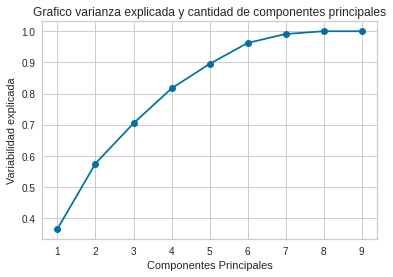

In [ ]:
variabilidad_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(variabilidad_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, variabilidad_explicada.cumsum(), '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Variabilidad explicada')
plt.title("Grafico varianza explicada y cantidad de componentes principales")
plt.show()

Obtenemos la suma de la variabilidad explicada de las componentes

In [ ]:
varianza_explicada=pca.explained_variance_ratio_
varianza_explicada.cumsum()

array([0.3650352 , 0.57514958, 0.70425327, 0.81638805, 0.89503465,
       0.96242024, 0.99120619, 1.        , 1.        ])

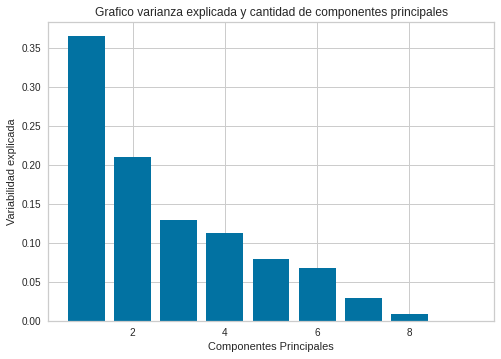

In [ ]:
list_x = list(range(1, len(variabilidad_explicada)+1))

plt.title("Grafico varianza explicada y cantidad de componentes principales")
plt.locator_params('x', nbins = 9)
plt.bar(list_x, variabilidad_explicada)
plt.xlabel(r'Componentes Principales')
plt.ylabel('Variabilidad explicada')
plt.show()

Vemos como con 6 componentes principales podemos explicar una variabilidad de 0.96431016, y asi poder relizar una reduccion de 1 componente del dataset original.

In [ ]:
target= pd.DataFrame((np.column_stack(ds_train['property_price'])).tolist()).T
ds_reducido_train = pd.concat([pca_df_aux, target], axis = 1)
ds_reducido_train.columns= ['cp_1', 'cp_2','cp_3','cp_4', 'cp_5', 'cp_6','cp_7','cp_8', 'cp_9' ,'target']
ds_reducido_train.drop(columns = ['cp_7','cp_8', 'cp_9'], inplace=True)

PCA para el test

In [ ]:
ds_reducido_test.drop(columns=["property_price"], inplace=True)

y = ds_reducido_test.values
y = sc.transform(y)


y_transformada = pca.transform(y)

pca_df_aux = pd.DataFrame(data = y_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4', 'cp_5', 'cp_6','cp_7','cp_8', 'cp_9'])

target= pd.DataFrame((np.column_stack(ds_test['property_price'])).tolist()).T
ds_reducido_test = pd.concat([pca_df_aux, target], axis = 1)
ds_reducido_test.columns= ['cp_1', 'cp_2','cp_3','cp_4', 'cp_5', 'cp_6','cp_7','cp_8', 'cp_9' ,'target']
ds_reducido_test.drop(columns = ['cp_7','cp_8', 'cp_9'], inplace=True)

In [ ]:
ds_reducido_test.shape

(16225, 7)

#### Persistencia archivos


In [ ]:
#ds_reducido_train.to_csv("properati_argentina_reducido_train.csv")
#ds_reducido_test.to_csv("properati_argentina_reducido_test.csv")

# Agrupamiento


## Clustering


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

Preparo el dataset a utilizar

Decidimos eliminar la columna place_l3 por la cantidade de valores posibles de esta variable. No seria eficiente entrenar un algoritmo con tantas columnas

In [ ]:
columnas_a_elimianar = ["place_l3"]

ds_train_kmeans = ds_train.drop(columns = columnas_a_elimianar)
ds_test_kmeans = ds_test.drop(columns = columnas_a_elimianar)


Aplicamos dummies para property_type


In [ ]:
ds_train_kmeans = pd.get_dummies(ds_train_kmeans, columns=['property_type'])
ds_test_kmeans = pd.get_dummies(ds_test_kmeans, columns=['property_type'])

ds_train_kmeans.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965             2.0                1.0   
256350 -34.580088 -58.424965             2.0                1.0   
135168 -34.551481 -58.452358             1.0                1.0   
227831 -34.632290 -58.464844             5.0                3.0   
409101 -34.549279 -58.463074             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
280087                    53.0                      49.0         80000.0   
256350                    35.0                      35.0         79900.0   
135168                    25.0                      20.0         69000.0   
227831                    75.0                      75.0        150000.0   
409101                    46.0                      34.0         85000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  
280087                   0                           1                 0  
256350                   0                           1                 0  
135168                   0                           1                 0  
227831                   0                           1                 0  
409101                   0                           1                 0

Aplicamos MinMaxScaler para variables numericas

Aplicamos MimMaxScaler para que se escalen las variables, MinMaxScaler permite mantener la proporcionalidad de los datos entre sí dentro del rango especificado, esto mejora la interpretacion de los datos para el algoritmo que estemos usando

In [ ]:
def aplicar_min_max(dataset):
    scaler = MinMaxScaler()
    dataset["property_surface_total"] = scaler.fit_transform(dataset["property_surface_total"].to_frame())
    dataset["property_surface_covered"] = scaler.fit_transform(dataset["property_surface_covered"].to_frame())
    dataset["property_price"] = scaler.fit_transform(dataset["property_price"].to_frame())
    dataset["property_bedrooms"] = scaler.fit_transform(dataset["property_bedrooms"].to_frame())
    dataset["property_rooms"] = scaler.fit_transform(dataset["property_rooms"].to_frame())

aplicar_min_max(ds_train_kmeans)


### Estimamos la cantidad apropiada de grupos que se deben formar.


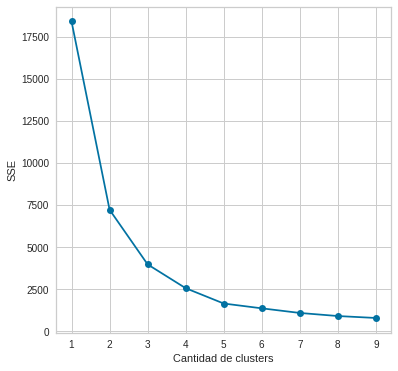

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_train_kmeans)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Dado que no hay un numero en donde se forme un "codo" pronunciadamente, voy a usar el indice de la silueta

In [ ]:
from sklearn.metrics import silhouette_score

list_k = list(range(3, 10))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(ds_train_kmeans)

    score = silhouette_score (ds_train_kmeans, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =3 silhouette score is 0.5791888431743082
For n_clusters =4 silhouette score is 0.597740014780857
For n_clusters =5 silhouette score is 0.6052735592817966
For n_clusters =6 silhouette score is 0.5840319153123935
For n_clusters =7 silhouette score is 0.5979266414717986
For n_clusters =8 silhouette score is 0.5666339953512903
For n_clusters =9 silhouette score is 0.5752896167162406


Obtenemos un maximo local para una cantidad de 5 clusters

### k_means con 5 clusters

In [ ]:
kmeans = KMeans(5, random_state=123)
kmeans.fit(ds_train_kmeans)

KMeans(n_clusters=5, random_state=123)

In [ ]:
clusters = kmeans.predict(ds_train_kmeans)
ds_train_kmeans["cluster"] = clusters

In [ ]:
ds_train_kmeans.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965        0.166667                0.0   
256350 -34.580088 -58.424965        0.166667                0.0   
135168 -34.551481 -58.452358        0.000000                0.0   
227831 -34.632290 -58.464844        0.666667                0.5   
409101 -34.549279 -58.463074        0.166667                0.0   

        property_surface_total  property_surface_covered  property_price  \
280087                0.011803                  0.017784        0.070423   
256350                0.007421                  0.012597        0.070329   
135168                0.004987                  0.007040        0.060094   
227831                0.017160                  0.027418        0.136150   
409101                0.010099                  0.012227        0.075117   

        property_type_Casa  property_type_Departamento  property_type_PH  \
280087                   0                           1                 0   
256350                   0                           1                 0   
135168                   0                           1                 0   
227831                   0                           1                 0   
409101                   0                           1                 0   

        cluster  
280087        2  
256350        2  
135168        2  
227831        0  
409101        2

#### Siulhuete

/home/fanu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


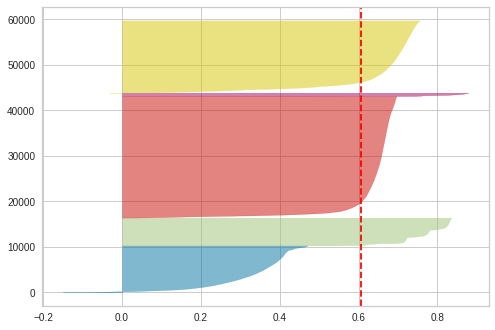

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_train_kmeans.drop(columns=["cluster"]))
plt.show()

Analizando el grafico podemos observar como los clusters 0 (amarillo) y 4 (azul) poseen outliers, sin bien son pocos comparados con la magnitud de los mismos cluster, es importante remarcarlo.  

#### Analisis por grupo

In [ ]:
#preparo dataset para analisis, necesito los valores sin normalizar para mejor interpretacion humana

#dummies
ds_grupos = pd.get_dummies(ds_train, columns=['property_type'])

#clusters
ds_grupos["cluster"] = ds_train_kmeans["cluster"]


##### Grafico los cluster en el mapa

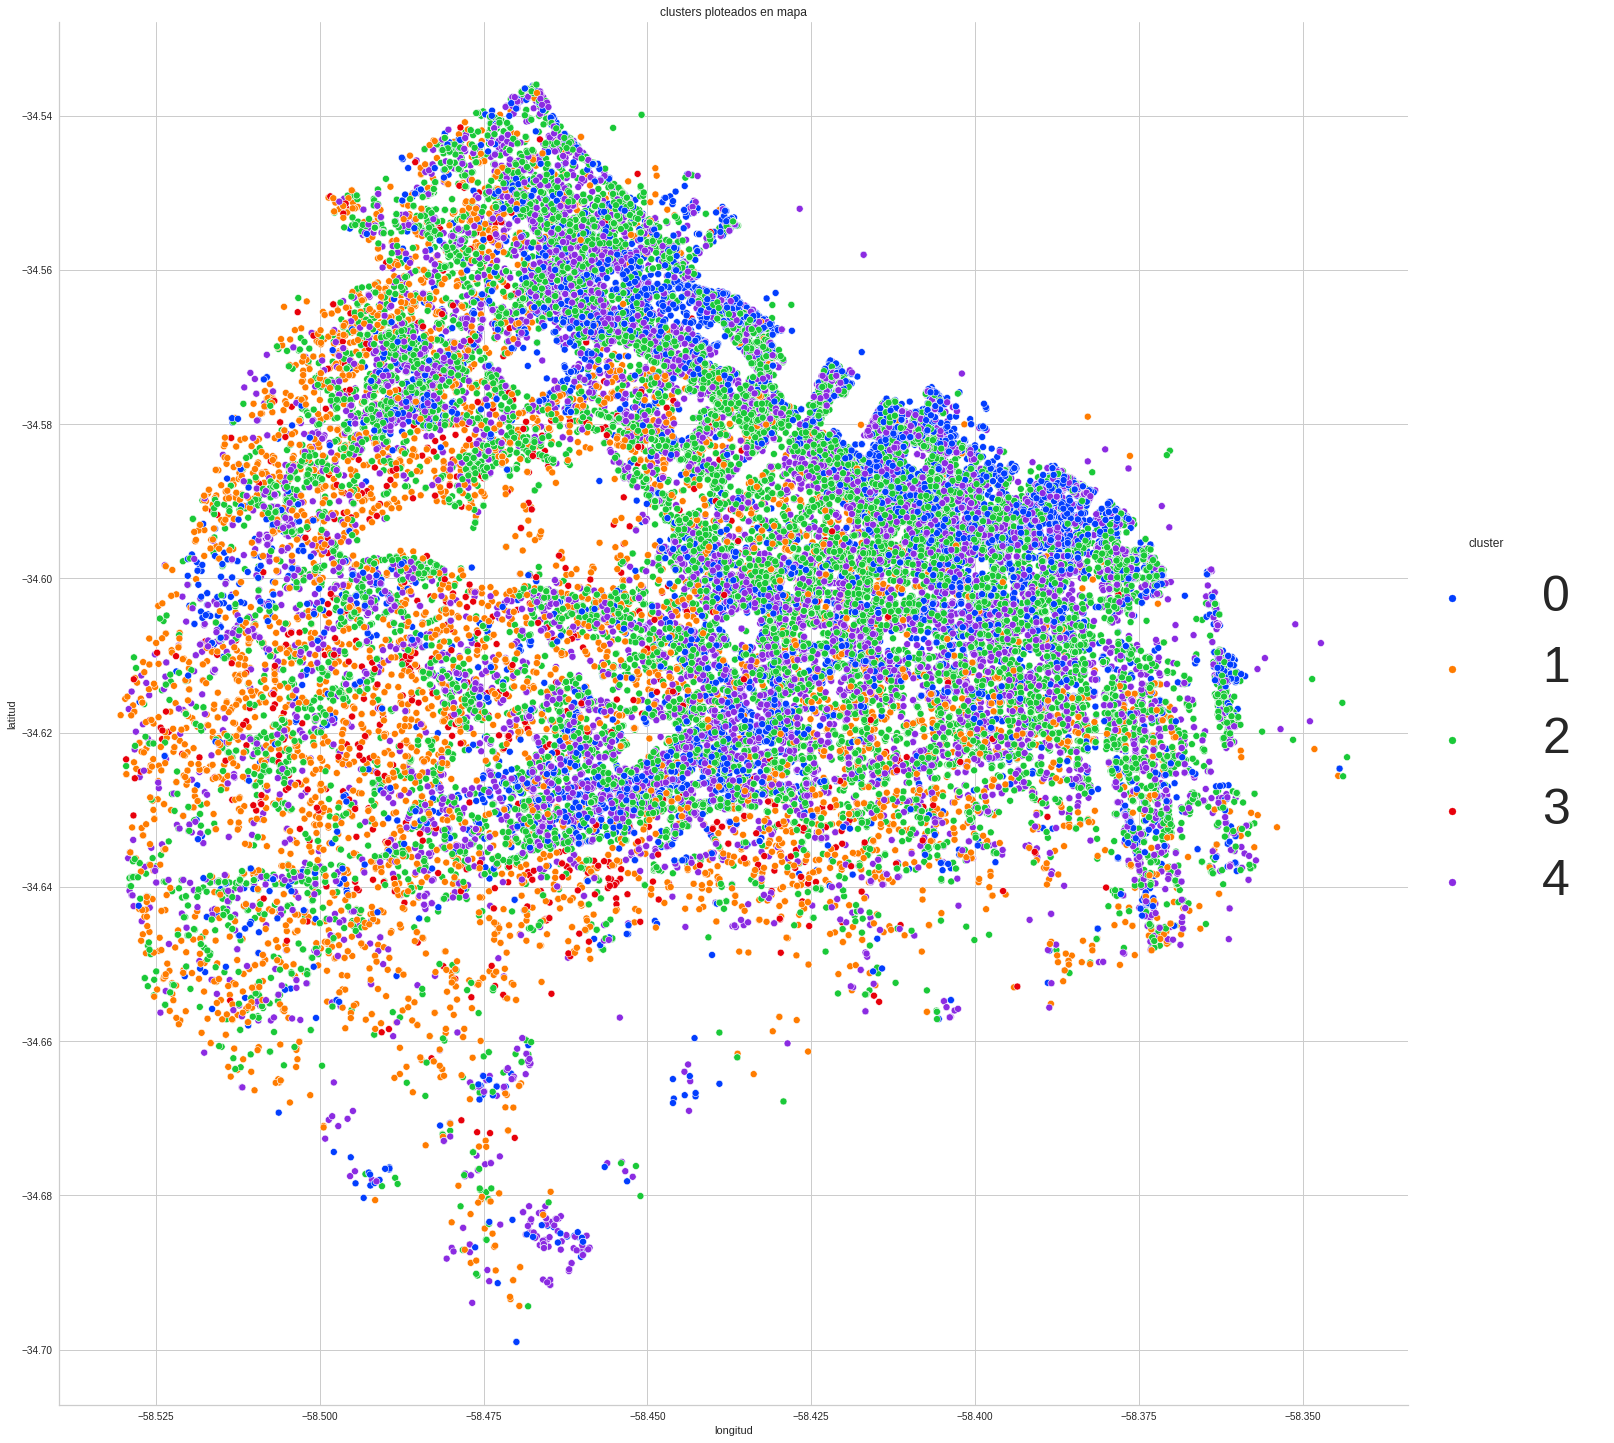

In [ ]:
graf_relplot=sns.relplot(data=ds_train_kmeans,x="longitud", y="latitud", hue="cluster", palette= "bright", height=20).set(title="clusters ploteados en mapa",xlabel='longitud',ylabel='latitud')

Analizo cada cluster

##### Grupo 0

In [ ]:
ds_grupo0 = ds_grupos[ds_grupos["cluster"] == 0]

In [ ]:
cantidad_de_obs = ds_grupo0.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 10282


Tipos y cantidad de propiedades en el grupo

In [ ]:
ds_grupo0[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento    10282
property_type_Casa                0
property_type_PH                  0
dtype: int64

- El cluster 0, coloreado en azul se lo observa bastante distribuido por todo el mapa
- Su unico tipo de propiedad es departamento.
- si miramos cuidadosamente observamos que tiene mayor densidad de apariciones en el centro de Capital Federal

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo0.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
sup_promedio = ds_grupo0.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")
rooms_promedio = ds_grupo0.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $352465.0 dolares
El property_surface_total promedio de las propiedades es de: 135.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 4.0 habitaciones


##### Grupo 1

In [ ]:
ds_grupo1 = ds_grupos[ds_grupos["cluster"] == 1]

In [ ]:
cantidad_de_obs = ds_grupo1.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 6110


Tipos y cantidad de propiedades en el grupo

In [ ]:
ds_grupo1[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento       0
property_type_Casa               0
property_type_PH              6110
dtype: int64

- El cluster 1, coloreado en naranja se lo observa mayoritariamente en zonas cercanas a la frontera con Provincia de Buenos Aires, barrios como: Villa Devoto, Villa Real, Monte Castro, Liniers, Savedra
- Su unico tipo de propiedad es PH.


Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo1.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")

sup_promedio = ds_grupo1.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")

rooms_promedio = ds_grupo1.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $163724.0 dolares
El property_surface_total promedio de las propiedades es de: 108.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 3.0 habitaciones


##### Grupo 2

In [ ]:
ds_grupo2 = ds_grupos[ds_grupos["cluster"] == 2]

In [ ]:
cantidad_de_obs = ds_grupo2.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 26692


Tipos y cantidad de propiedades en el grupo

In [ ]:
ds_grupo2[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento    26692
property_type_Casa                0
property_type_PH                  0
dtype: int64

- El cluster 2, coloreado en verde se lo observa mayoritariamente en toda la zona que limita con el Rio de la Plata, en barrios como: Belgrano, Palermo, Retiro, Recoleta, y Nunez.
- Su unico tipo de propiedad es departamento.

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo2.property_price.mean().round()
sup_promedio = ds_grupo2.property_surface_total.mean().round()

print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")

rooms_promedio = ds_grupo2.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $109150.0 dolares
El property_surface_total promedio de las propiedades es de: 47.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 2.0 habitaciones


##### Grupo 3

In [ ]:
ds_grupo3 = ds_grupos[ds_grupos["cluster"] == 3]

In [ ]:
cantidad_de_obs = ds_grupo3.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 774


Tipos y cantidad de propiedades en el grupo

In [ ]:
ds_grupo3[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento      0
property_type_Casa            774
property_type_PH                0
dtype: int64

- El cluster 3, coloreado en rojo se lo observa mayoritariamente en toda la zonas compartidas con el cluster 1.
- Su unico tipo de propiedad es casa.
- Es el cluster con menor cantidad de registros

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo3.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")

sup_promedio = ds_grupo3.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")

rooms_promedio = ds_grupo3.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $264850.0 dolares
El property_surface_total promedio de las propiedades es de: 166.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 4.0 habitaciones


#### Grupo 4

In [ ]:
ds_grupo4 = ds_grupos[ds_grupos["cluster"] == 4]

In [ ]:
cantidad_de_obs = ds_grupo4.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 15883


Tipos y cantidad de propiedades en el grupo

In [ ]:
ds_grupo4[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento    15883
property_type_Casa                0
property_type_PH                  0
dtype: int64

- El cluster 4, coloreado en violeta se lo observa mayoritariamente en toda la franja en contacto en el Rio de la Plata, aun mas cerca del mismo que el custer 2
- Su unico tipo de propiedad es departamento.

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo4.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
sup_promedio = ds_grupo4.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")

rooms_promedio = ds_grupo4.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $183814.0 dolares
El property_surface_total promedio de las propiedades es de: 78.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 3.0 habitaciones


### k_means con 3 clusters

Preparo Dataset

In [ ]:
columnas_a_elimianar = ["place_l3"]

ds_train_kmeans2 = ds_train.drop(columns = columnas_a_elimianar)
ds_train_kmeans2.head()

latitud   longitud property_type  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965  Departamento             2.0                1.0   
256350 -34.580088 -58.424965  Departamento             2.0                1.0   
135168 -34.551481 -58.452358  Departamento             1.0                1.0   
227831 -34.632290 -58.464844  Departamento             5.0                3.0   
409101 -34.549279 -58.463074  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
280087                    53.0                      49.0         80000.0  
256350                    35.0                      35.0         79900.0  
135168                    25.0                      20.0         69000.0  
227831                    75.0                      75.0        150000.0  
409101                    46.0                      34.0         85000.0

In [ ]:
ds_train_kmeans2 = pd.get_dummies(ds_train_kmeans2, columns=['property_type'])
ds_train_kmeans2.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965             2.0                1.0   
256350 -34.580088 -58.424965             2.0                1.0   
135168 -34.551481 -58.452358             1.0                1.0   
227831 -34.632290 -58.464844             5.0                3.0   
409101 -34.549279 -58.463074             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
280087                    53.0                      49.0         80000.0   
256350                    35.0                      35.0         79900.0   
135168                    25.0                      20.0         69000.0   
227831                    75.0                      75.0        150000.0   
409101                    46.0                      34.0         85000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  
280087                   0                           1                 0  
256350                   0                           1                 0  
135168                   0                           1                 0  
227831                   0                           1                 0  
409101                   0                           1                 0

In [ ]:
aplicar_min_max(ds_train_kmeans2)
ds_train_kmeans2.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965        0.166667                0.0   
256350 -34.580088 -58.424965        0.166667                0.0   
135168 -34.551481 -58.452358        0.000000                0.0   
227831 -34.632290 -58.464844        0.666667                0.5   
409101 -34.549279 -58.463074        0.166667                0.0   

        property_surface_total  property_surface_covered  property_price  \
280087                0.011803                  0.017784        0.070423   
256350                0.007421                  0.012597        0.070329   
135168                0.004987                  0.007040        0.060094   
227831                0.017160                  0.027418        0.136150   
409101                0.010099                  0.012227        0.075117   

        property_type_Casa  property_type_Departamento  property_type_PH  
280087                   0                           1                 0  
256350                   0                           1                 0  
135168                   0                           1                 0  
227831                   0                           1                 0  
409101                   0                           1                 0

In [ ]:
kmeans = KMeans(3, random_state=123)
kmeans.fit(ds_train_kmeans2)

KMeans(n_clusters=3, random_state=123)

In [ ]:
clusters = kmeans.predict(ds_train_kmeans2)
ds_train_kmeans2["cluster"] = clusters

In [ ]:
ds_train_kmeans2.head()

latitud   longitud  property_rooms  property_bedrooms  \
280087 -34.601807 -58.469965        0.166667                0.0   
256350 -34.580088 -58.424965        0.166667                0.0   
135168 -34.551481 -58.452358        0.000000                0.0   
227831 -34.632290 -58.464844        0.666667                0.5   
409101 -34.549279 -58.463074        0.166667                0.0   

        property_surface_total  property_surface_covered  property_price  \
280087                0.011803                  0.017784        0.070423   
256350                0.007421                  0.012597        0.070329   
135168                0.004987                  0.007040        0.060094   
227831                0.017160                  0.027418        0.136150   
409101                0.010099                  0.012227        0.075117   

        property_type_Casa  property_type_Departamento  property_type_PH  \
280087                   0                           1                 0   
256350                   0                           1                 0   
135168                   0                           1                 0   
227831                   0                           1                 0   
409101                   0                           1                 0   

        cluster  
280087        0  
256350        0  
135168        0  
227831        2  
409101        0

#### Silhouette


/home/fanu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


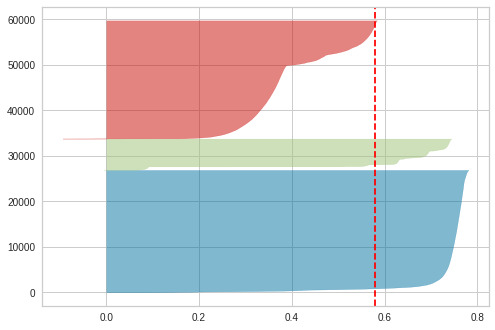

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_train_kmeans2.drop(columns=["cluster"]))
plt.show()

Como se observa en el grafico, tenemos 3 grupos de diferentes tamanios. El cluster Rojo posee outliers .


#### Analisis por grupo


In [ ]:
#preparo dataset para analisis, necesito los valores sin normalizar para mejor interpretacion humana

#dummies
ds_grupos = pd.get_dummies(ds_train, columns=['property_type'])

#clusters
ds_grupos["cluster"] = ds_train_kmeans2["cluster"]

##### Grupo 0

In [ ]:
ds_grupo0 = ds_grupos[ds_grupos["cluster"] == 0]

In [ ]:
cantidad_de_obs = ds_grupo0.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 26883


Tipo y cantidad de observaciones de property_type

In [ ]:
ds_grupo0[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento    26883
property_type_Casa                0
property_type_PH                  0
dtype: int64

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo0.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
sup_promedio = ds_grupo0.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")
rooms_promedio = ds_grupo0.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $109862.0 dolares
El property_surface_total promedio de las propiedades es de: 47.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 2.0 habitaciones


Observar que este grupo solo posee propiedades del tipo departamento, esto es un buen indicio que los clusters se formaron en base del tipo de propiedad

##### Grupo 1

In [ ]:
ds_grupo1 = ds_grupos[ds_grupos["cluster"] == 1]

In [ ]:
cantidad_de_obs = ds_grupo1.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 6884


Tipo y cantidad de observaciones del tipo property_price

In [ ]:
ds_grupo1[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento       0
property_type_Casa             774
property_type_PH              6110
dtype: int64

In [ ]:
precio_prom = ds_grupo1[ds_grupo1["property_type_Casa"] == 1]["property_price"].mean().round()
sup_prom = ds_grupo1[ds_grupo1["property_type_Casa"] == 1]["property_surface_total"].mean().round()
rooms_prom = ds_grupo1[ds_grupo1["property_type_Casa"] == 1]["property_rooms"].mean().round()

print("El precio promedio de las propiedades Casa es de: $" + str(precio_prom) + " dolares")
print("Cantidad de habitaciones promedio de las propiedades Casa es: " + str(rooms_prom))
print("La superficie promedio de propiedades Casa es: " + str(sup_prom) + " metros cuadrados")

precio_prom = ds_grupo1[ds_grupo1["property_type_PH"] == 1]["property_price"].mean().round()
sup_prom = ds_grupo1[ds_grupo1["property_type_PH"] == 1]["property_surface_total"].mean().round()
rooms_prom = ds_grupo1[ds_grupo1["property_type_PH"] == 1]["property_rooms"].mean().round()

print("El precio promedio de las propiedades PH es de: $" + str(precio_prom) + " dolares")
print("Cantidad de habitaciones promedio de las propiedades PH es: " + str(rooms_prom) + " habitaciones")
print("La superficie promedio de propiedades PH es: " + str(sup_prom) + " metros cuadrados")

El precio promedio de las propiedades Casa es de: $264850.0 dolares
Cantidad de habitaciones promedio de las propiedades Casa es: 4.0
La superficie promedio de propiedades Casa es: 166.0 metros cuadrados
El precio promedio de las propiedades PH es de: $163724.0 dolares
Cantidad de habitaciones promedio de las propiedades PH es: 3.0 habitaciones
La superficie promedio de propiedades PH es: 108.0 metros cuadrados


Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo1.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
sup_promedio = ds_grupo1.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")
rooms_promedio = ds_grupo1.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $175094.0 dolares
El property_surface_total promedio de las propiedades es de: 114.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 3.0 habitaciones


En este caso, la mayoria de los registros son del tipo PH, pero hay una cantidad de propiedades del tipo casa en este cluster.

##### Grupo 2

In [ ]:
ds_grupo2 = ds_grupos[ds_grupos["cluster"] == 2]

In [ ]:
cantidad_de_obs = ds_grupo2.shape[0]
print("La cantidad de registros en este cluster es de: " + str(cantidad_de_obs))

La cantidad de registros en este cluster es de: 25974


Tipo y cantidad de observaciones del tipo property_price

In [ ]:
ds_grupo2[["property_type_Departamento", "property_type_Casa", "property_type_PH"]].sum()

property_type_Departamento    25974
property_type_Casa                0
property_type_PH                  0
dtype: int64

Algunos valores importantes

In [ ]:
precio_promedio = ds_grupo2.property_price.mean().round()
print("El precio promedio de las propiedades es de: $" + str(precio_promedio) + " dolares")
sup_promedio = ds_grupo2.property_surface_total.mean().round()
print("El property_surface_total promedio de las propiedades es de: " + str(sup_promedio) + " metros cuadrados")
rooms_promedio = ds_grupo2.property_rooms.mean().round()
print("El property_rooms promedio de las propiedades es de: " + str(rooms_promedio) + " habitaciones")

El precio promedio de las propiedades es de: $250387.0 dolares
El property_surface_total promedio de las propiedades es de: 101.0 metros cuadrados
El property_rooms promedio de las propiedades es de: 4.0 habitaciones


#### conclusiones

- Observando los cluster podemos observar que el tipo de propiedad tiene peso a la hora de decidir los clusters, tenemos dos clusters con solo proiedades del tipo departamento, y otro cluster con ambos, PH y Casa

Vemos que los clusters que poseen solo departamentos se diferencian en:

cluster 0:
- El precio promedio de las propiedades es de: $259060.0 dolares
- El property_surface_total promedio de las propiedades es de: 102.0 metros cuadrados
- El property_rooms promedio de las propiedades es de: 4.0 habitaciones


cluster 2:    
- El precio promedio de las propiedades es de: $111069.0 dolares
- El property_surface_total promedio de las propiedades es de: 48.0 metros cuadrados
- El property_rooms promedio de las propiedades es de: 2.0 habitaciones
                

- Si bien los clusters tienen propiedades iguales, hay una diferencia marcada en precio superficie y habitaciones, siendo los del cluster 0 "mejores" en esos aspectos.

#### Mapa


Delimitacionn de capital federal


In [ ]:
ds_mapa_point = geopandas.GeoDataFrame(ds_train_kmeans2, geometry=geopandas.points_from_xy(ds_train_kmeans2.longitud, ds_train_kmeans2.latitud))
ds_mapa_capital = geopandas.read_file("barrios_2/barrios-polygon.shp")

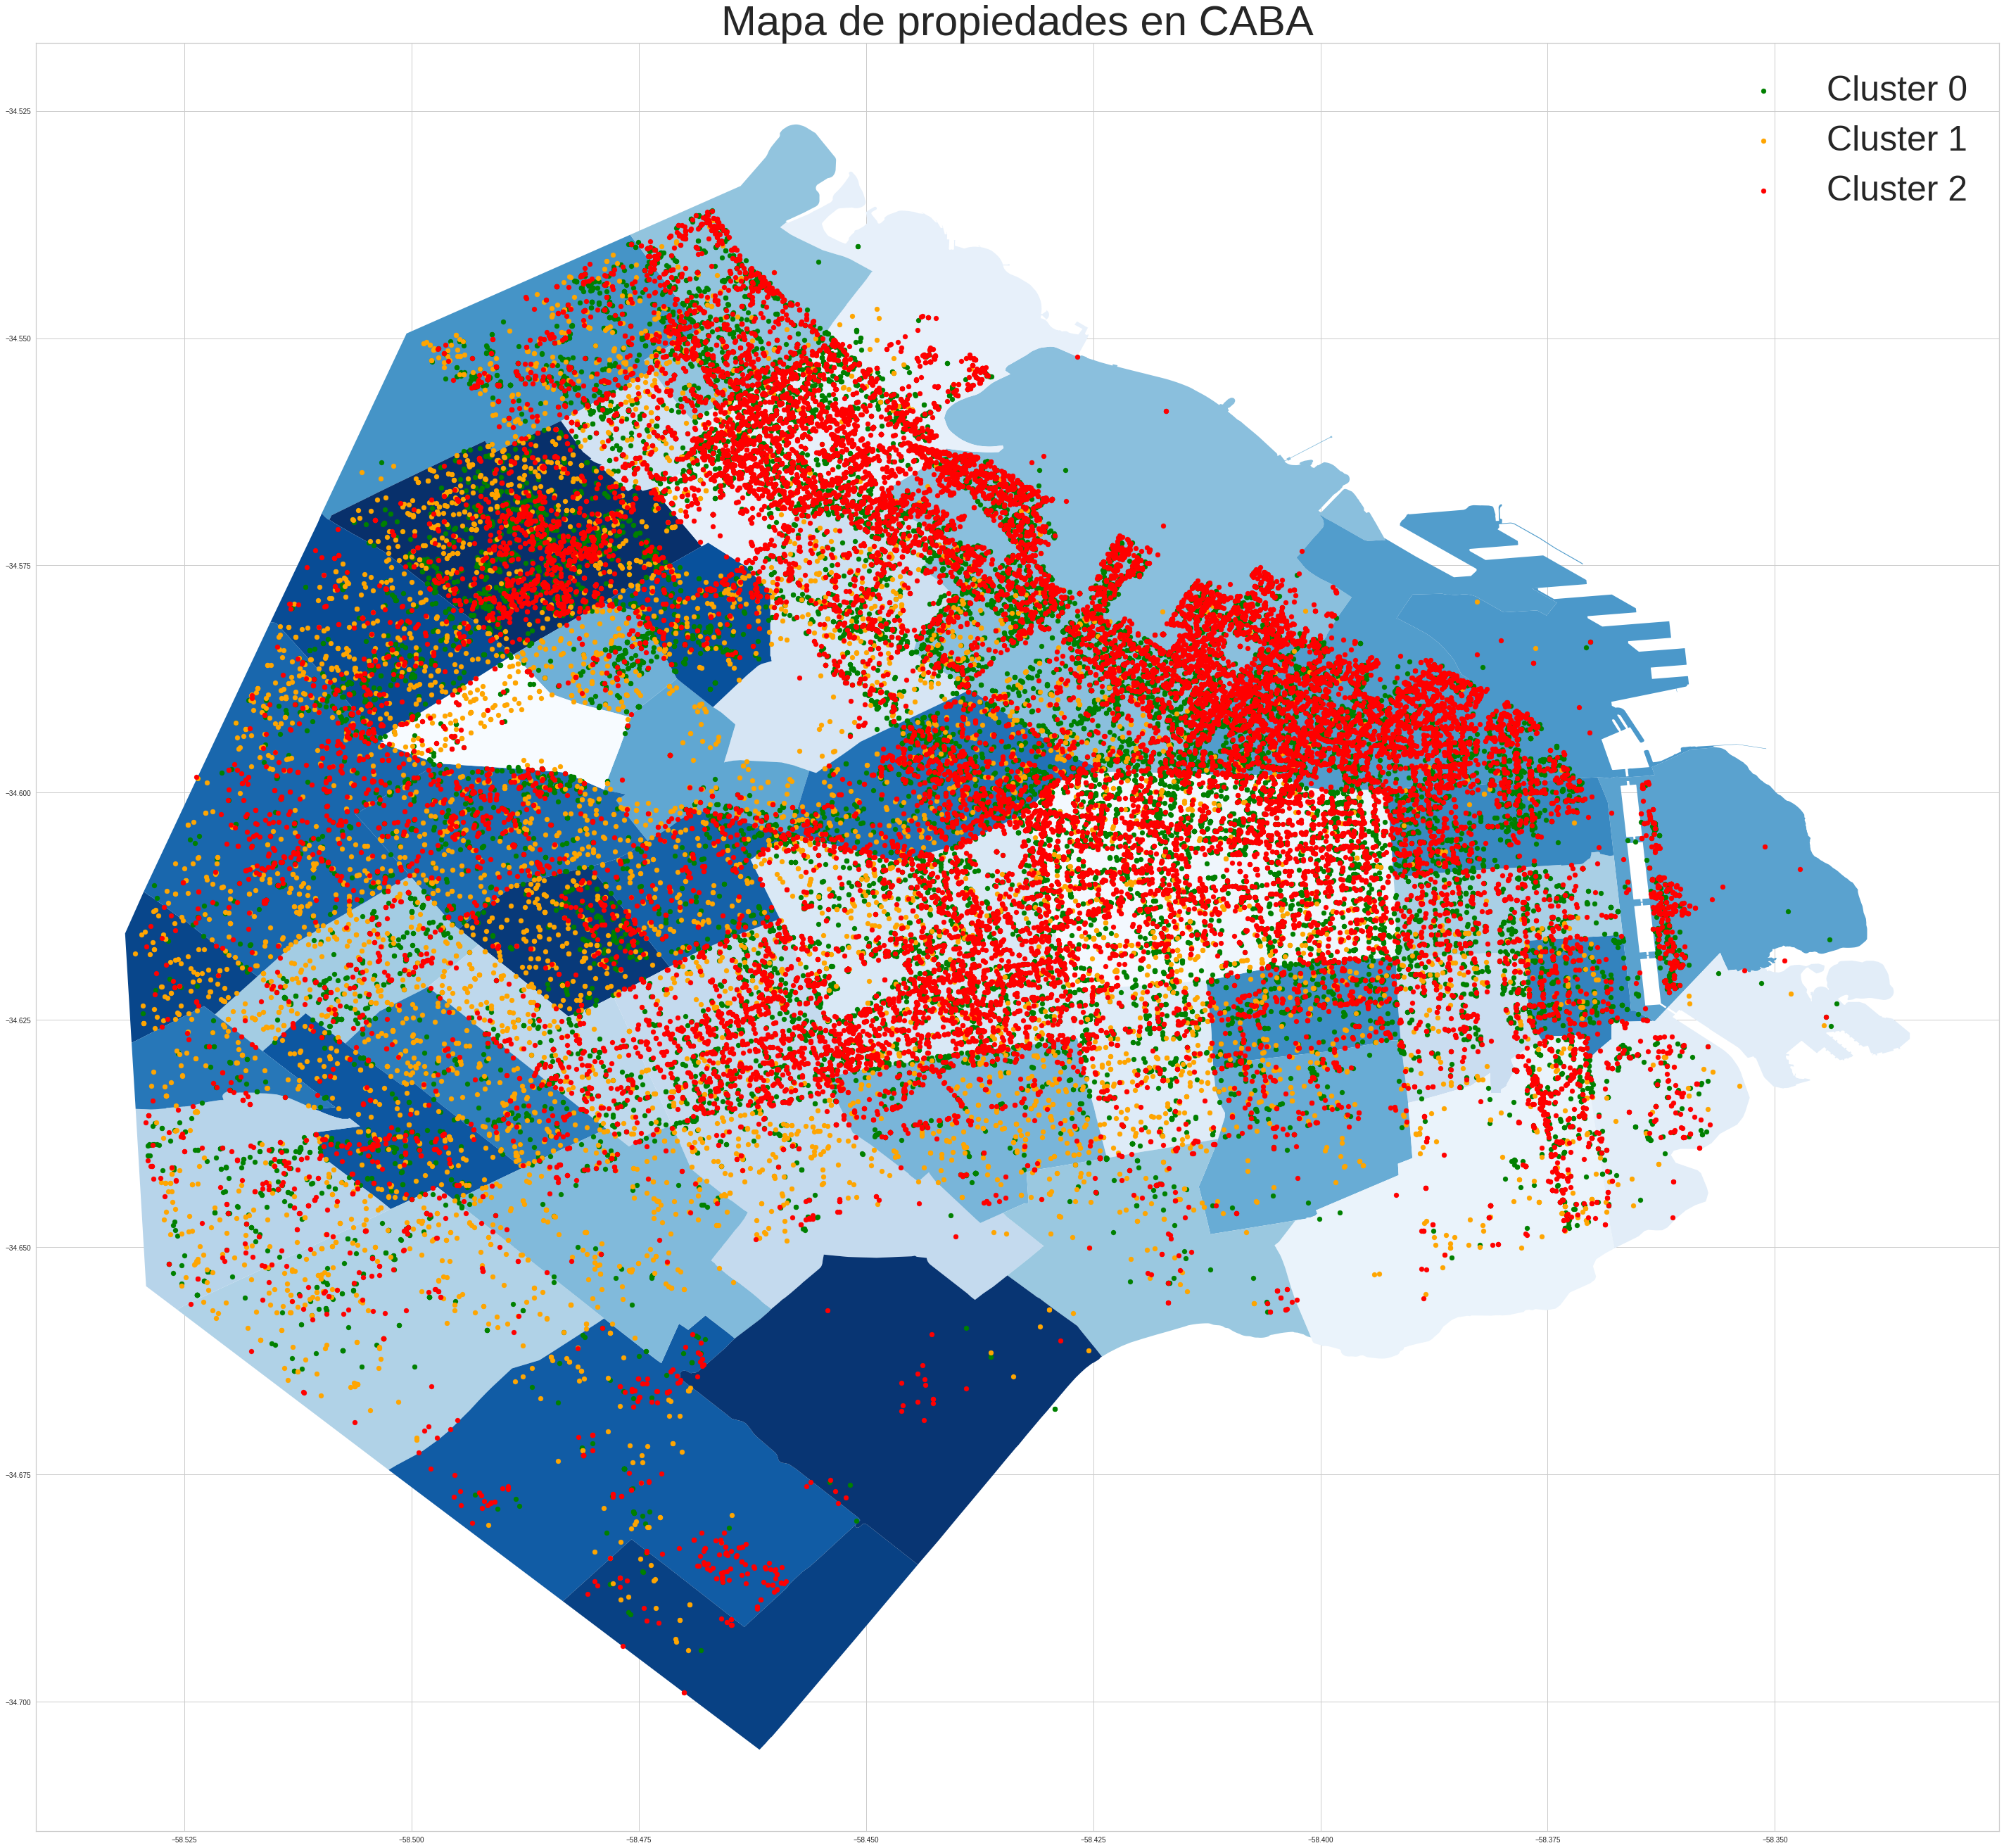

In [ ]:
fig,ax = plt.subplots(figsize = (50,50))

ds_mapa_capital.plot(ax = ax, column = "BARRIO", cmap = "Blues")
ds_mapa_point[ds_mapa_point["cluster"] == 0].plot(ax = ax, color = "green",label="Cluster 0")
ds_mapa_point[ds_mapa_point["cluster"] == 1].plot(ax = ax, color = "orange", label = "Cluster 1") 
ds_mapa_point[ds_mapa_point["cluster"] == 2].plot(ax = ax, color = "red", label="Cluster 2") 
ax.set_title("Mapa de propiedades en CABA", fontdict = {"fontsize" : "60"})
plt.rc('legend', fontsize=50)
plt.legend()
plt.show()

Podemos observar en el mapa diferntes observaciones:

- En Zona sur casi no hay numero de propiedades en venta
- Se ven muchos anuncios en los barrios mas poblados, como son palermo, Belgrano, Caballito, Flores etc
- Mas cerca del rio es donde hay mayor cantidad de propiedades